In [875]:
# Importamos las librerias que vamos a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from scipy.stats import norm
from scipy import stats 
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder


from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [876]:
# Creamos una variable con la ruta del archivo
archivo = 'regression_data.xls'

# Cargamos el archivo Excel en un DataFrame
regression_data = pd.read_excel(archivo)

# Realizamos una copia de seguridad
df= regression_data.copy()


In [877]:
# Observamos la cantidad de columnas y filas que tiene el data base
df.shape

(21597, 21)

In [878]:
# Consultamos la información contenida
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

### Descripción de las columnas 

* Id: Unique identification number for the property
* date: the date the house was sold
* price: the price of the house
* waterfront: the house which has a view to a waterfront
* condition: How good the condition is (Overall). 1 indicates worn-out property and 5 excellent.
* grade: Overall grade given to the housing unit, based on the King County grading system. 1 poor, 13 excellent.
* Sqft_above: square footage of house apart from the basement
* Sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotSize area.
* Sqft_lot15: lotSize area in 2015(implies-- some renovations)

In [879]:
# Visualizamos si el DataFrame tiene valores nulos

null_counts = df.isnull().sum()
print(null_counts)

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64


In [880]:
# Extraemos el mes y el año en columnas separadas
df['mes'] = df['date'].dt.month
df['anio'] = df['date'].dt.year

In [881]:
# Lista con los nombres de las columnas
lista_columnas = df.columns.tolist()

print(lista_columnas)

['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price', 'mes', 'anio']


In [882]:
# Ordenamos columnas 
column_order = ['id', 'date', 'mes', 'anio', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']
# Reordenar las columnas utilizando reindex()
df = df.reindex(columns=column_order)

In [883]:
# Lista de columnas de interés
columnas_interes = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade' ]

# Obtener el número de valores únicos para cada columna
for columna in columnas_interes:
    conteo_valores = df[columna].value_counts()
    print(columna)
    print(conteo_valores)
    print()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

floors
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

waterfront
0    21434
1      163
Name: waterfront, dtype: int64

view
0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

condition
3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

grade
7     8974
8     6065
9     2615
6     2038
1

In [884]:
# Luego de realizado el análisis de las principales variables vemos que existen propiedades con mas de 9 habitaciones, vamos a seleccionarlas para analizarlas en profundidad.add()

# Propiedades con mas de 9 habitaciones
x = 9

# Seleccionar los valores mayores a x en la columna 'bedrooms'
resultado = df[df['bedrooms'] > x]
resultado

,id,date,mes,anio,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
8748,1773100755,2014-08-21,8,2014,11,3.00,3000,4960,2.0,0,...,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,520000
13301,627300145,2014-08-14,8,2014,10,5.25,4590,10920,1.0,0,...,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400,1150000
15147,5566100170,2014-10-29,10,2014,10,2.00,3610,11914,2.0,0,...,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,650000
15856,2402100895,2014-06-25,6,2014,33,1.75,1620,6000,1.0,0,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000
19239,8812401450,2014-12-29,12,2014,10,3.00,2920,3745,2.0,0,...,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745,660000


In [885]:
# Para el caso de la propiedad que tiene 33 habitaciones no existe coherencia por lo tanto la eliminamos

df = df.drop(df[df['bedrooms'] == 33].index)

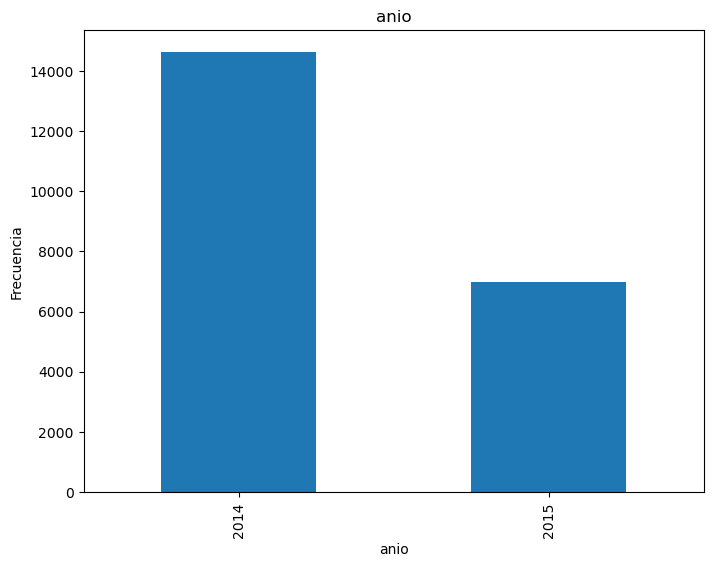

In [886]:
# Selecciono la columna de interés
columna = 'anio'

# Creo un gráfico de barras
df[columna].value_counts().plot(kind='bar', figsize=(8,6))

# Personalizo el gráfico
plt.title('anio')
plt.xlabel(columna)
plt.ylabel('Frecuencia')

# Mostro el gráfico
plt.show()

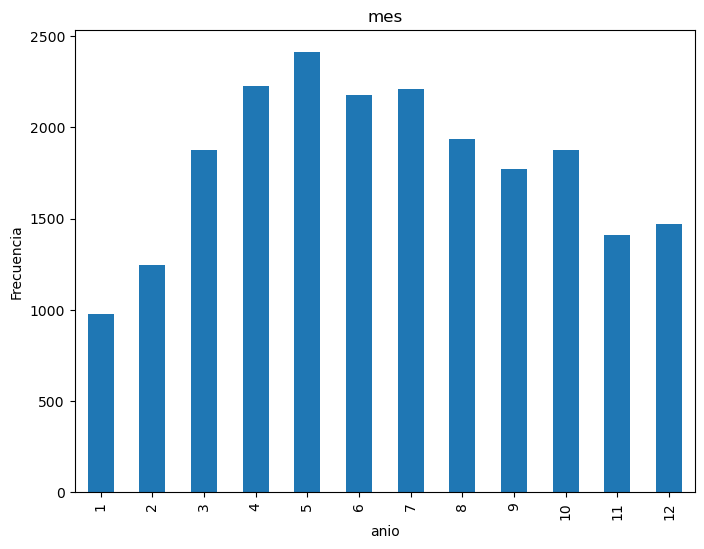

In [887]:
# Obtengo los valores únicos y ordenarlos
valores_unicos_ordenados = sorted(df['mes'].unique())

# Crear un gráfico de barras ordenado por los valores únicos
df['mes'].value_counts().reindex(valores_unicos_ordenados).plot(kind='bar', figsize=(8, 6))

# Personalizar el gráfico
plt.title('mes')
plt.xlabel(columna)
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [888]:
# Elimino la columna 'date' 
df = df.drop(columns=['date'])

In [889]:
# Verificamos si la columna 'id' tiene valores duplicados

duplicados = df.duplicated(subset='id', keep=False)

# Filtra el DataFrame original para mostrar solo las filas duplicadas
df_duplicados = df[duplicados]

df_duplicados

# Vemos que existen varias transacciones de una misma propiedad


,id,mes,anio,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
93,6021501535,7,2014,3,1.50,1580,5000,1.0,0,0,...,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,430000
94,6021501535,12,2014,3,1.50,1580,5000,1.0,0,0,...,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,700000
313,4139480200,6,2014,4,3.25,4290,12103,1.0,0,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1380000
314,4139480200,12,2014,4,3.25,4290,12103,1.0,0,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1400000
324,7520000520,9,2014,2,1.00,1240,12092,1.0,0,0,...,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,232000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3,2015,4,2.50,2680,5539,2.0,0,0,...,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,502000
20763,6300000226,6,2014,4,1.00,1200,2171,1.5,0,0,...,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,240000
20764,6300000226,5,2015,4,1.00,1200,2171,1.5,0,0,...,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,380000
21564,7853420110,10,2014,3,3.00,2780,6000,2.0,0,0,...,2780,0,2013,0,98065,47.5184,-121.886,2850,6000,594866


In [890]:
"""Como vemos que existen mas de una transaccion con el mismo ID, por nos quedamos con la ultima transacción ya que no disponemos de conocimiento
para el tratamiento de variables temporales y considero fundamentelaes para realizar un buen analisis de las transacciones."""

# Elimino duplicados en la columna 'id' y quedo con el último valor
df = df.drop_duplicates(subset=['id'], keep='last')

In [891]:
# Verificamos que no existan filas duplicadas
filas_duplicadas = df.duplicated(keep=False)

# Filtramos DataFrame
df_filas_duplicadas = df[filas_duplicadas]

df_filas_duplicadas


,id,mes,anio,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [892]:
df.shape

(21419, 22)

In [893]:
# Verificamos nuevamente si la columna 'id' tiene valores duplicados

duplicados = df.duplicated(subset='id', keep=False)

# Filtra el DataFrame original para mostrar solo las filas duplicadas
df_duplicados = df[duplicados]

df_duplicados

# Vemos que existen varias transacciones de una misma propiedad

,id,mes,anio,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [894]:
df.describe()

,id,mes,anio,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.141900e+04,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,2.141900e+04,21419.000000,21419.000000,21419.000000,...,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,2.141900e+04
mean,4.581042e+09,6.564032,2014.325272,3.372566,2.118446,2083.154256,1.512846e+04,1.496008,0.007610,0.235118,...,1791.205285,291.948971,1971.094122,84.797049,98077.873197,47.560191,-122.213778,1988.414819,12776.095196,5.418568e+05
std,2.876790e+09,3.117916,0.468487,0.903013,0.768734,918.824411,4.153172e+04,0.540083,0.086905,0.767182,...,828.696414,442.881467,29.387365,402.583607,53.478453,0.138590,0.140792,685.538299,27346.204562,3.675649e+05
min,1.000102e+06,1.000000,2014.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123375e+09,4.000000,2014.000000,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,...,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000,3.249500e+05
50%,3.904921e+09,6.000000,2014.000000,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572100,-122.230000,1840.000000,7620.000000,4.505000e+05
75%,7.308900e+09,9.000000,2015.000000,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,...,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.678050,-122.125000,2370.000000,10086.500000,6.450000e+05
max,9.900000e+09,12.000000,2015.000000,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


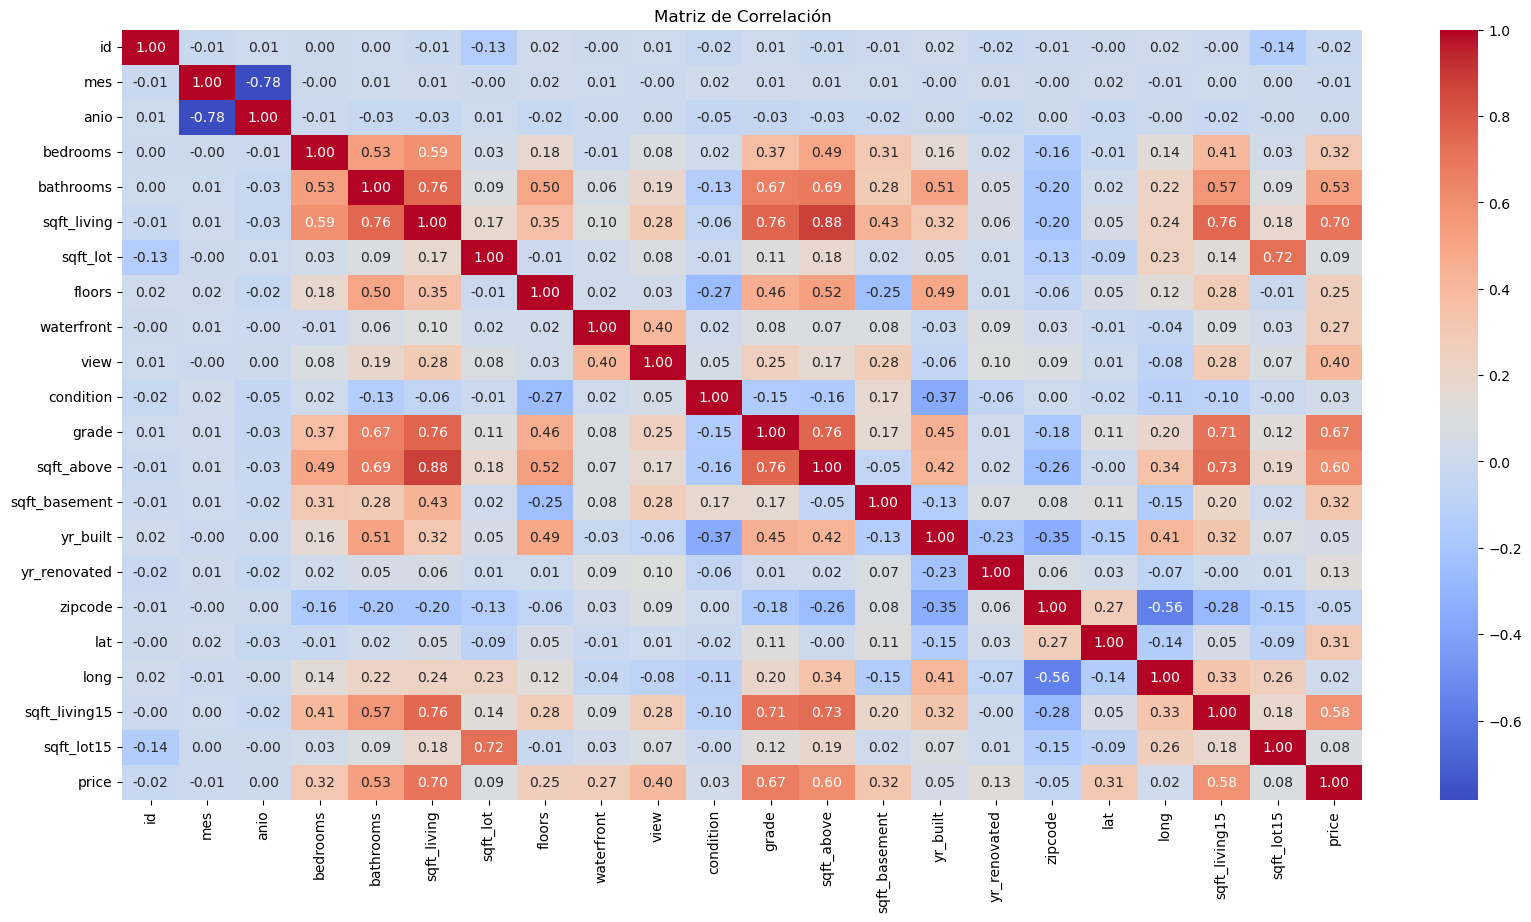

In [895]:
# Creamos una tabla de correlatividad para conocer el comportamiento de los datos

corr_matrix = df.corr(numeric_only=True)

# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 10))

# Cambiamos el mapa de colores (cmap) para mejorar la visualización
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Agregar título al heatmap
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


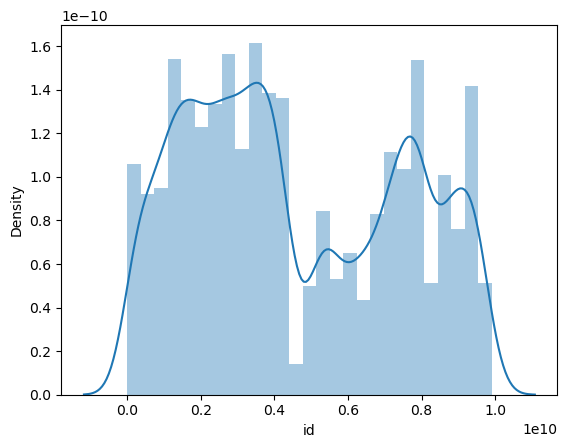

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


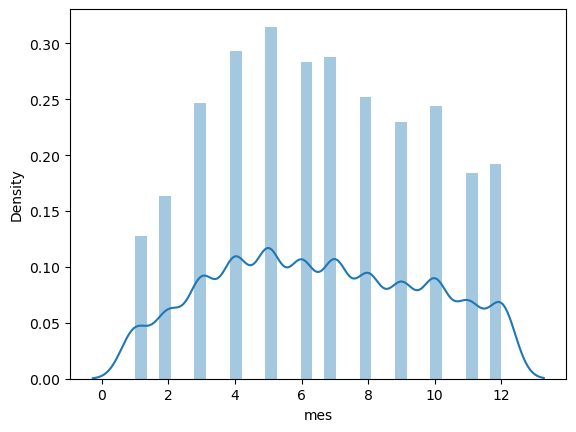

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


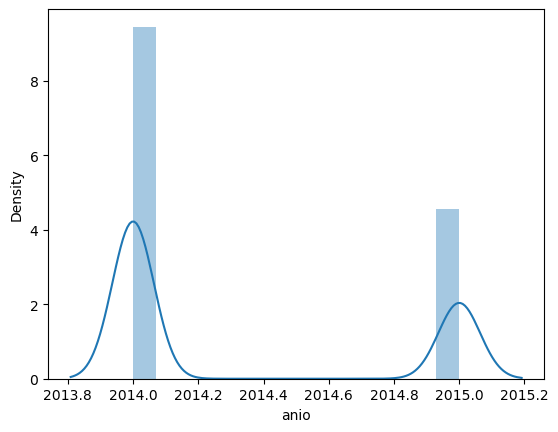

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


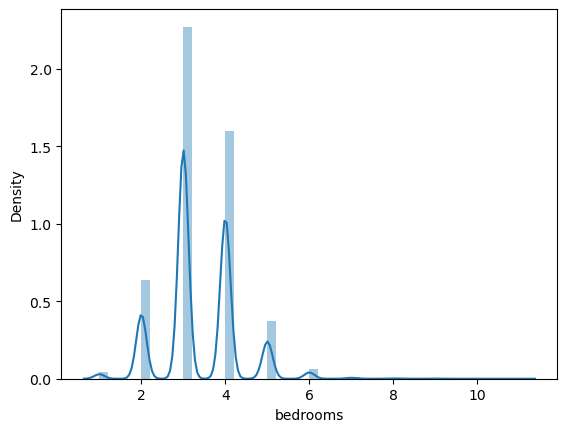

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


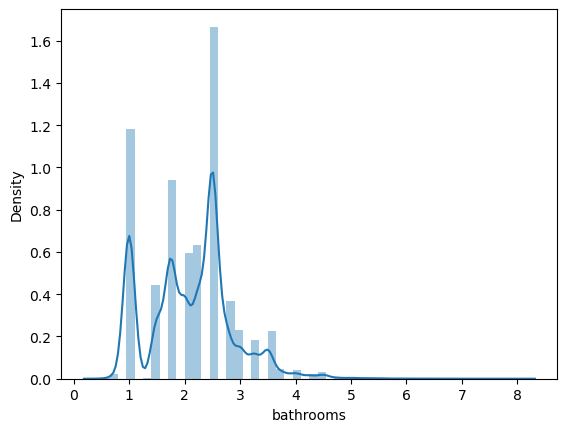

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


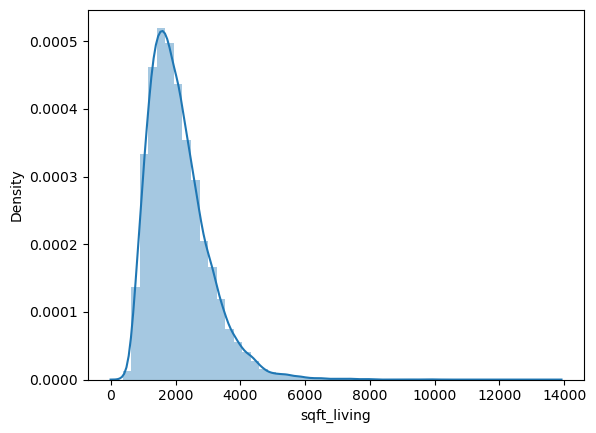

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


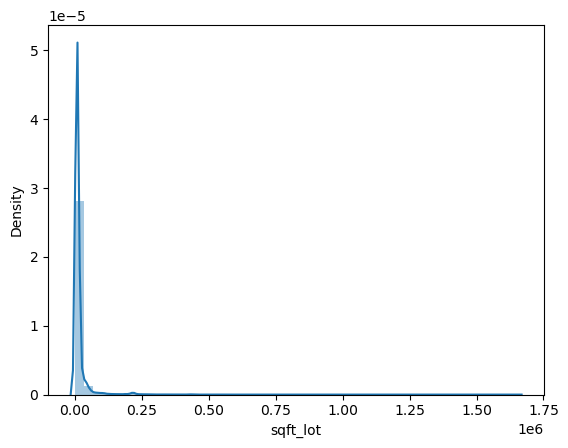

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


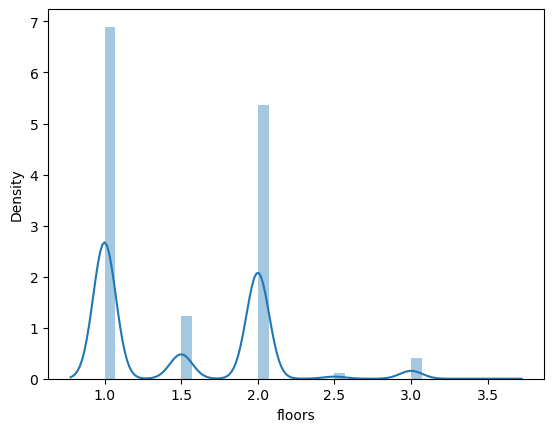

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


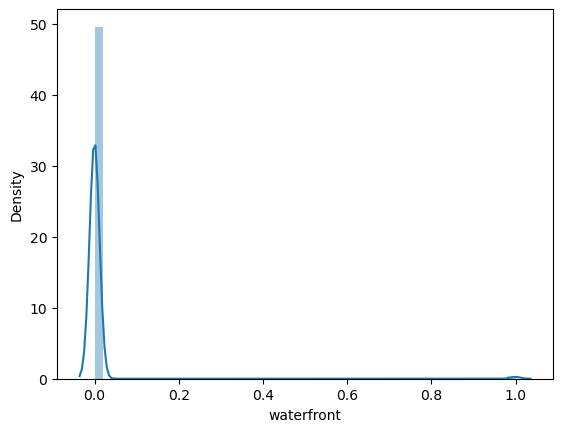

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


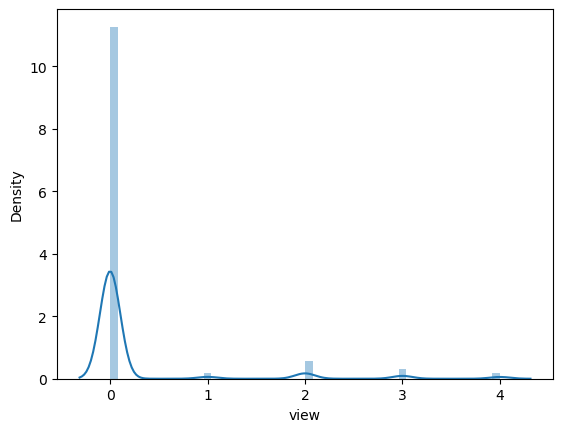

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


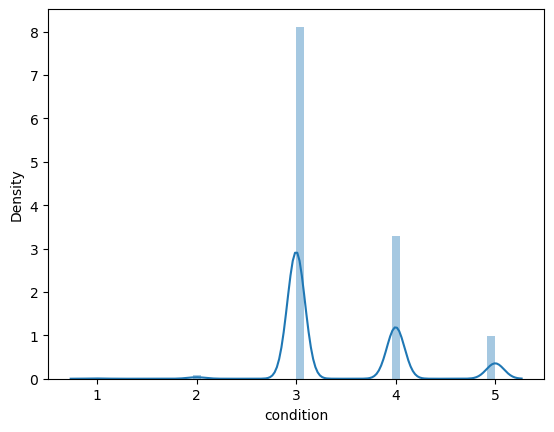

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


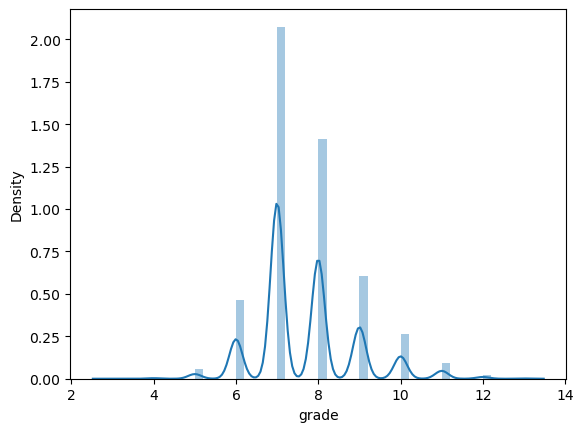

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


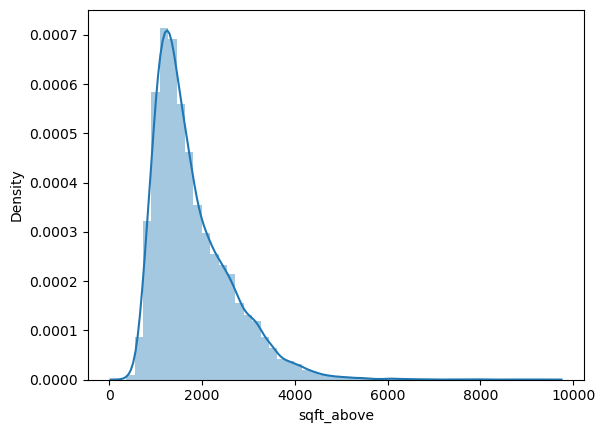

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


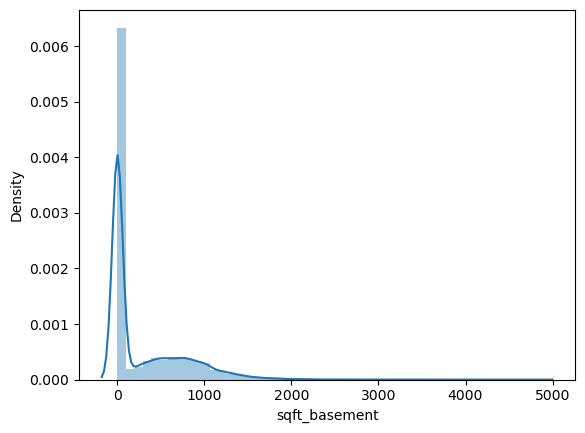

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


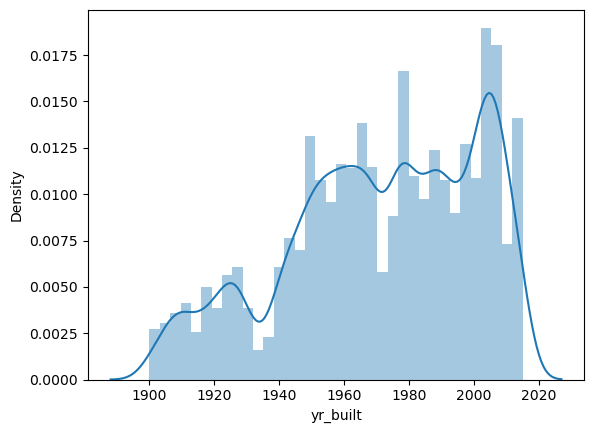

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


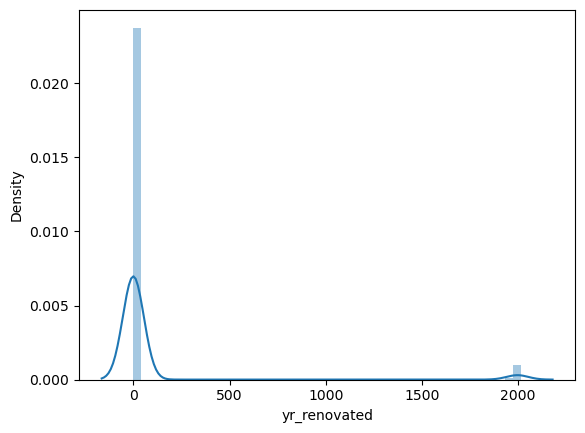

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


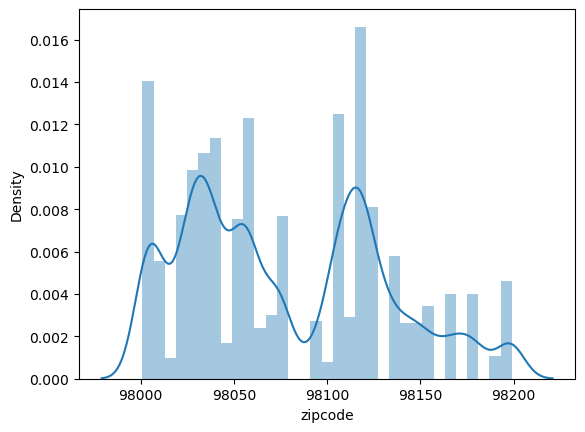

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


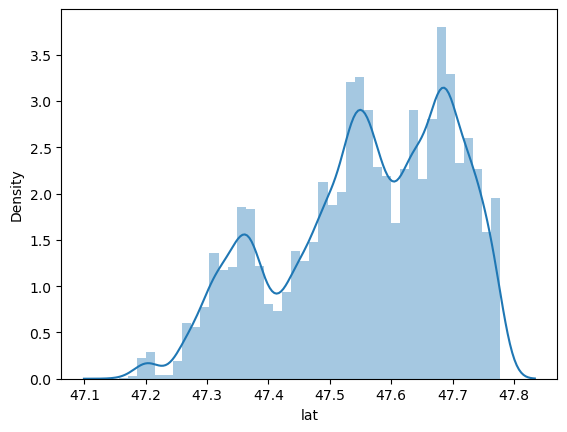

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


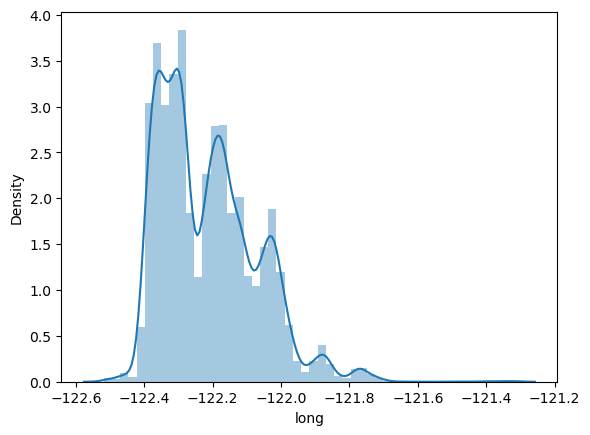

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


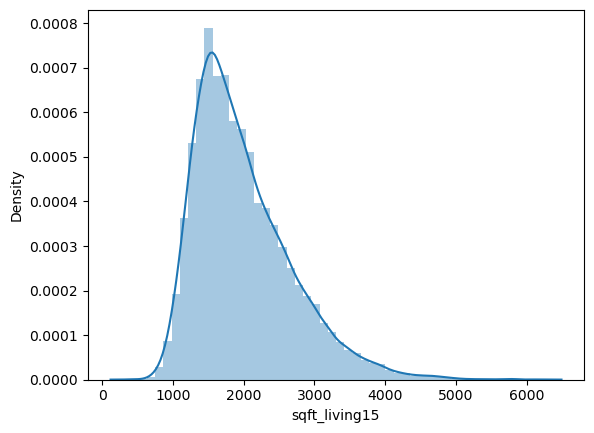

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


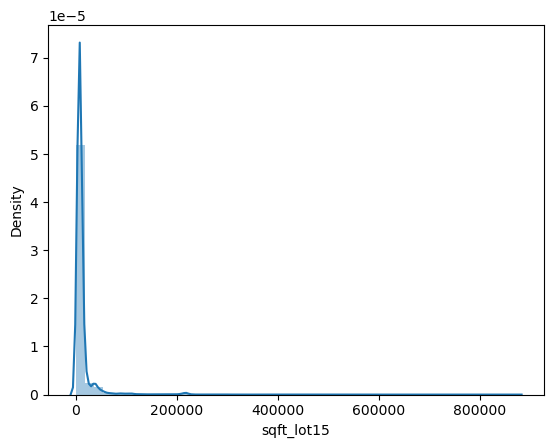

C:\Users\aguva\AppData\Local\Temp\ipykernel_12124\2868219426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns])


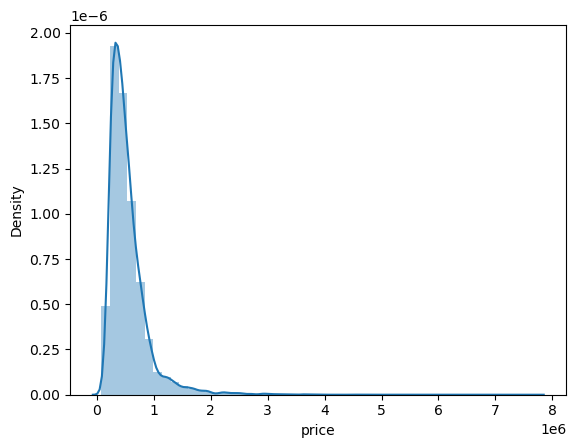

In [896]:
for columns in df.columns:
    sns.distplot(df[columns])
    plt.show()

### Procedemos al modelización de DataFrame con las variables y valores que tienen, probando de esta forma cuatro modelos




In [897]:
# Creamos una funcion con un test_size variable para ver como performa el modelo con distintos tamaños
def regression_metrics(df, target_column):
    test_sizes=[0.4, 0.3, 0.2, 0.1]
    
    X = df.drop([target_column], axis=1)
    Y = df[target_column]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    print(model.summary())
    for size in test_sizes:  
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size, random_state=42)
        lm = LinearRegression()
        model = lm.fit(X_train, y_train)
        predictions = lm.predict(X_test)
        
        mse = mean_squared_error(y_test, predictions)
        print(f"Test size: {size}, MSE: {mse}")
        
        rmse = math.sqrt(mse)
        print(f"Test size: {size}, RMSE: {rmse}")
        
        r2 = r2_score(y_test, predictions)
        print(f"Test size: {size}, R2: {r2}")
        
        n = len(X_test)
        p = X_test.shape[1]
        adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
        print(f"Test size: {size}, Adjusted R2: {adj_r2}")
        print("----------------------------------")

In [898]:
# Supongamos que tienes un DataFrame llamado 'df'
# y 'price' es la columna objetivo
regression_metrics(df, 'price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2520.
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:49:01   Log-Likelihood:            -2.9191e+05
No. Observations:               21419   AIC:                         5.839e+05
Df Residuals:                   21398   BIC:                         5.840e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.724e+07   9.98e+06     -6.740

KNeighborsRegressor

MLPRegressor

In [926]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

# Supongamos que tienes los datos X e Y ya definidos

def train_and_test_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        predictions = model.predict(X_test)
        
        # Calculate MSE
        mse = mean_squared_error(y_test, predictions)
        
        # Calculate R-squared
        r2 = r2_score(y_test, predictions)
        
        # Store the results
        results[model_name] = {
            'MSE': mse,
            'R-squared': r2
        }
    
    return results

def train_and_test_multiple_models(models, X_train, X_test, y_train, y_test):
    results = train_and_test_models(models, X_train, X_test, y_train, y_test)
    
    # Print the results for each model
    for model_name, metrics in results.items():
        print(f"Model: {model_name}")
        print(f"MSE: {metrics['MSE']}")
        print(f"R-squared: {metrics['R-squared']}")
        print("---------------------------------------")

# Modelos
models = {
    "KNN": KNeighborsRegressor(),
    "MLP": MLPRegressor()
}

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

train_and_test_multiple_models(models, X_train, X_test, y_train, y_test)


Model: KNN
MSE: 72928870836.02083
R-squared: 0.4071725586716217
---------------------------------------
Model: MLP
MSE: 171549504345.58743
R-squared: -0.39449922309938
---------------------------------------


In [900]:
# Vemos que continua existiendo una correlaccion bastante fuerte entre sqft_above con sqft_living15 y sqft_lot15
# Como sabemos que existe una correlacion entre mes y año elimino año ya que estamos hablando de un espacio temporal de dos años

df2= df.copy()

df2 = df2.drop(['sqft_living', 'sqft_lot', 'anio'], axis=1)


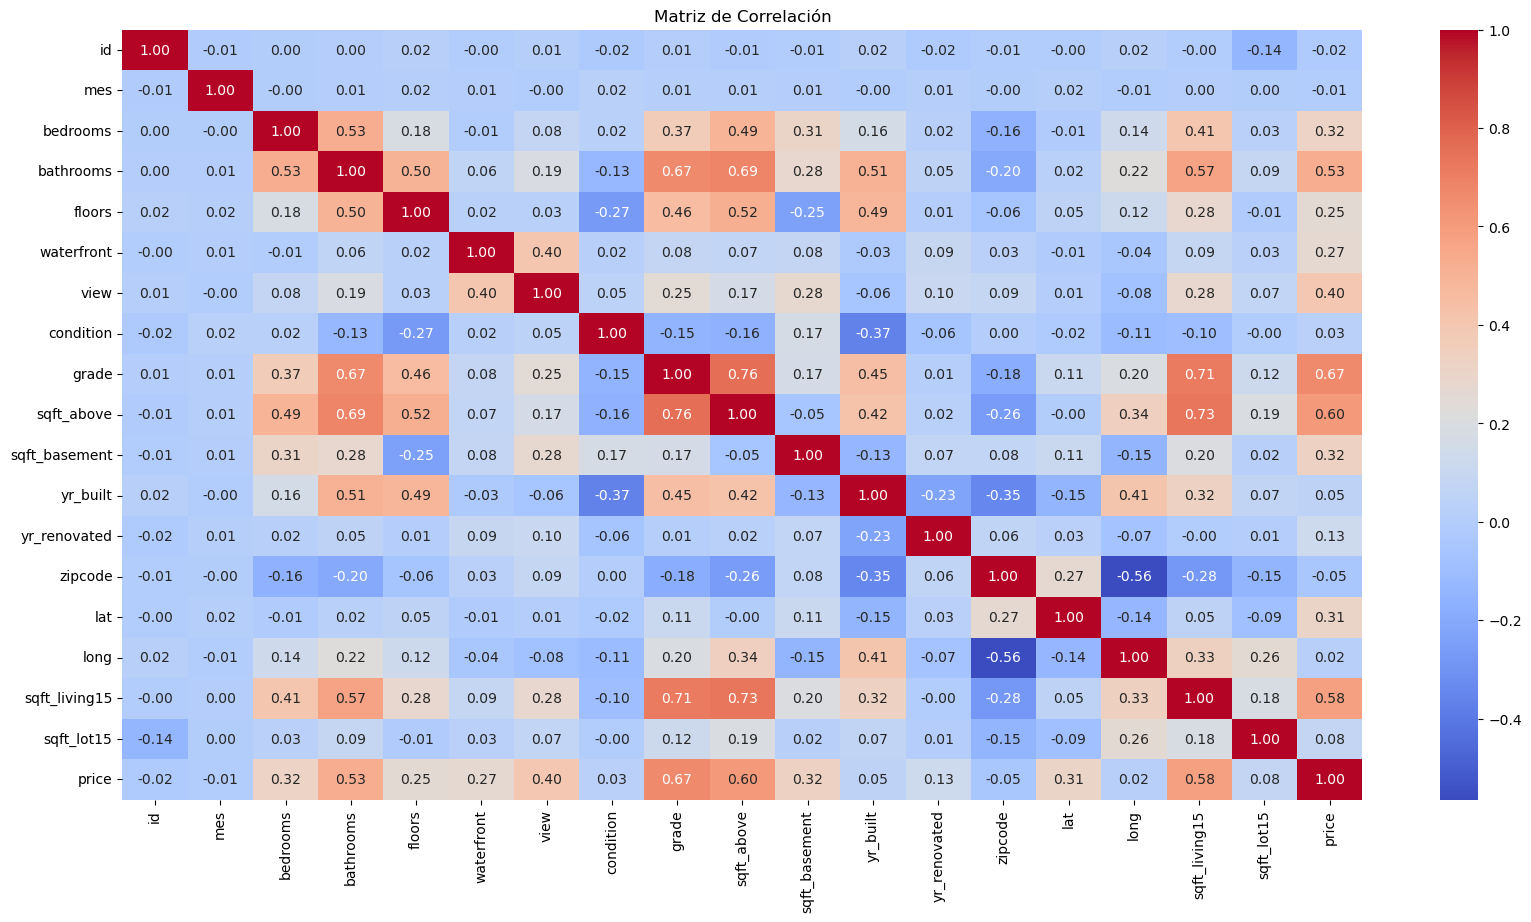

In [901]:
# Creamos una tabla de correlatividad para conocer el comportamiento de los datos

corr_matrix = df2.corr(numeric_only=True)

# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 10))

# Cambiamos el mapa de colores (cmap) para mejorar la visualización
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Agregar título al heatmap
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

In [902]:
# Para las variables de espacialidad opto por mantener el Zipcode de las propiedades

df2 = df2.drop(['lat', 'long'], axis=1)

In [903]:
df2

,id,mes,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,7129300520,10,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,6414100192,12,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,5631500400,2,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,2487200875,12,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,1954400510,2,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5,3,2.50,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000
21593,6600060120,2,4,2.50,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000
21594,1523300141,6,2,0.75,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101
21595,291310100,1,3,2.50,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000


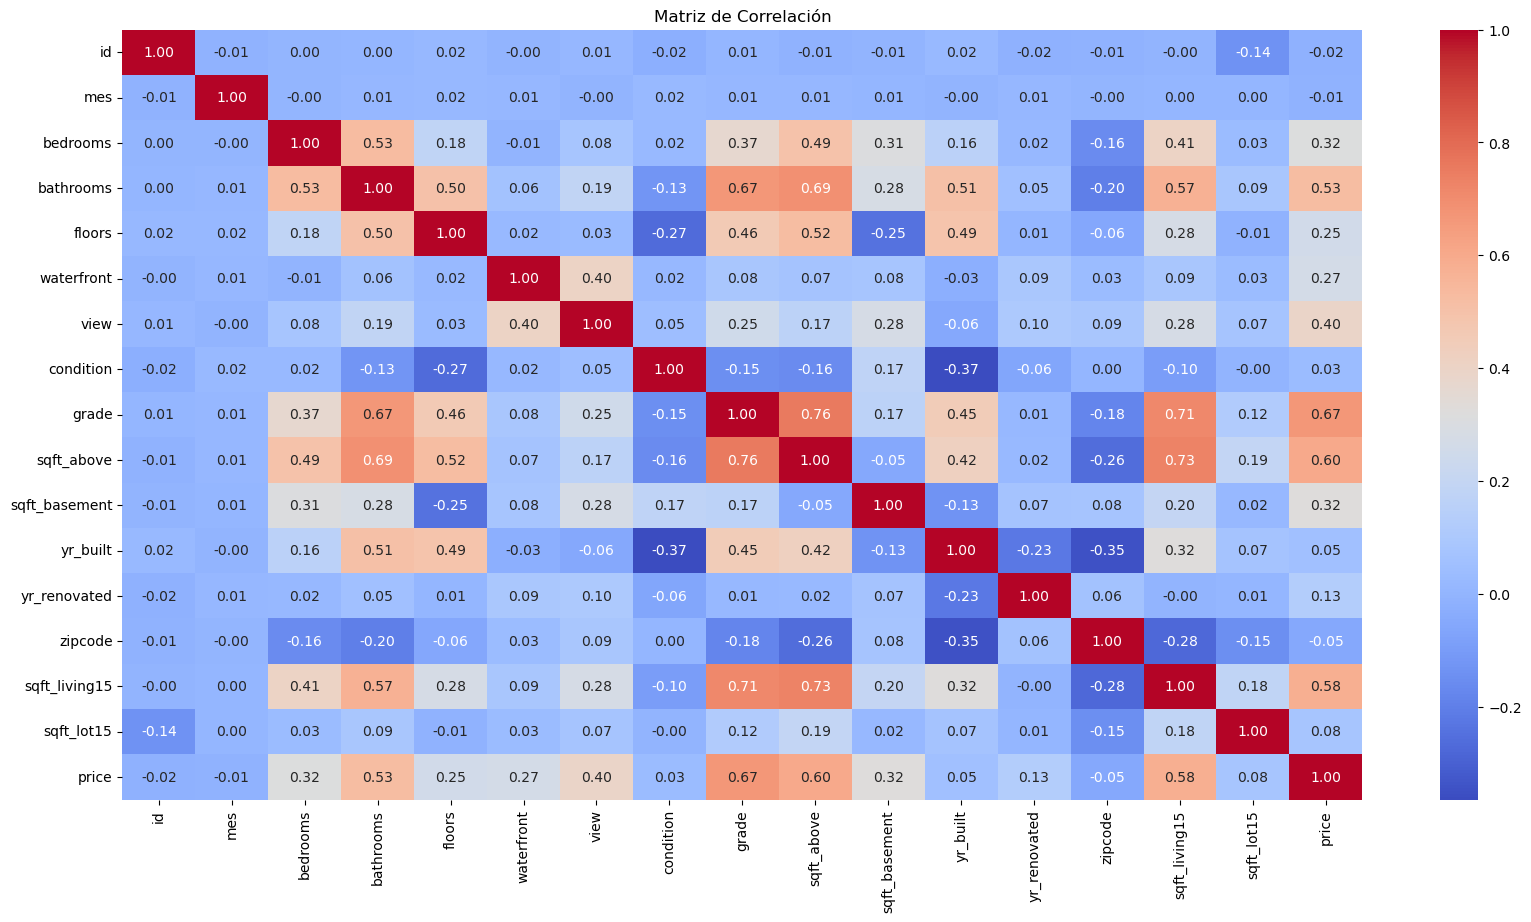

In [904]:
# Creamos una tabla de correlatividad para conocer el comportamiento de los datos

corr_matrix = df2.corr(numeric_only=True)

# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 10))

# Cambiamos el mapa de colores (cmap) para mejorar la visualización
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Agregar título al heatmap
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

In [905]:
# Ejecutamos la funcion para el DataFrame modificado
regression_metrics(df2, 'price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2542.
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:49:05   Log-Likelihood:            -2.9346e+05
No. Observations:               21419   AIC:                         5.870e+05
Df Residuals:                   21402   BIC:                         5.871e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.569e+06   3.14e+06      2.410

KNeighborsRegressor

MLPRegressor

In [906]:
def train_and_test_models(models, X_train, X_test, y_train, y_test):
    results = {}
    
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        predictions = model.predict(X_test)
        
        # Evaluate the model's performance
        r2 = r2_score(y_test, predictions)
        
        # Store the results
        results[model_name] = r2
    
    return results

def train_and_test_multiple_models(models, X_train, X_test, y_train, y_test):
    results = train_and_test_models(models, X_train, X_test, y_train, y_test)

    # Print the results
    for model_name, r2 in results.items():
        print(f"{model_name}: R2 score = {r2}")

#Modelos
models = {
    "KNN": KNeighborsRegressor(),
    "MLP": MLPRegressor()
}

train_and_test_multiple_models(models, X_train, X_test, y_train, y_test)

KNN: R2 score = 0.3998038886236416
MLP: R2 score = -1.8142947548177877


Vemos que eliminar variables con correlaciones significativas entre ellas no reflejan una mejora en los modelos, todo lo contrario fue contraproducente ya que el modelo perdió fidelidad.

Utilizamos el VIF (Factor de Inflación de la Varianza) ya que es una medida utilizada en análisis de regresión para evaluar la multicolinealidad entre las variables independientes. La multicolinealidad ocurre cuando dos o más variables independientes están altamente correlacionadas entre sí, lo que puede afectar negativamente el rendimiento y la interpretación del modelo de regresión.

In [907]:
#VARIANCE INFLATION FACTOR:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import cross_val_score

data_corr = df.copy()

data_corr.drop(columns=['price', 'sqft_living'], inplace=True)
vif = {}
data_corr = add_constant(data_corr)
for i in np.arange(data_corr.shape[1]):
    column_name = data_corr.columns[i]
    value = variance_inflation_factor(np.array(data_corr), i)
    vif[column_name] = value

vif

# Existe una combinacion linear entre sqft_above, stqf_basement, sqft_living, es por eso que debemos eliminar una de ellas elegimos sqft_living ya que tiene una varianza mas alta tiene una varianza mas alta 

c:\Users\aguva\anaconda3\envs\Ironhack\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


{'const': 0.0,
 'id': 1.0283163281527092,
 'mes': 2.591230762896776,
 'anio': 2.6020809116296983,
 'bedrooms': 1.713920353444516,
 'bathrooms': 3.378217101663134,
 'sqft_lot': 2.103639537679831,
 'floors': 2.012205531458593,
 'waterfront': 1.2058474849613903,
 'view': 1.4385461460637576,
 'condition': 1.2590201320936147,
 'grade': 3.4276226058849333,
 'sqft_above': 4.978303835188362,
 'sqft_basement': 2.030047435175543,
 'yr_built': 2.436886895552543,
 'yr_renovated': 1.1535323714024937,
 'zipcode': 1.6631641359653713,
 'lat': 1.181120604762002,
 'long': 1.8351963127180602,
 'sqft_living15': 2.97738684417599,
 'sqft_lot15': 2.1421110519229822}

In [908]:
# Creamos una copia

df3= df.copy()

In [909]:
#Eliminamos la variable sqft_living

df3 = df3.drop([ 'sqft_living', 'id'], axis=1)

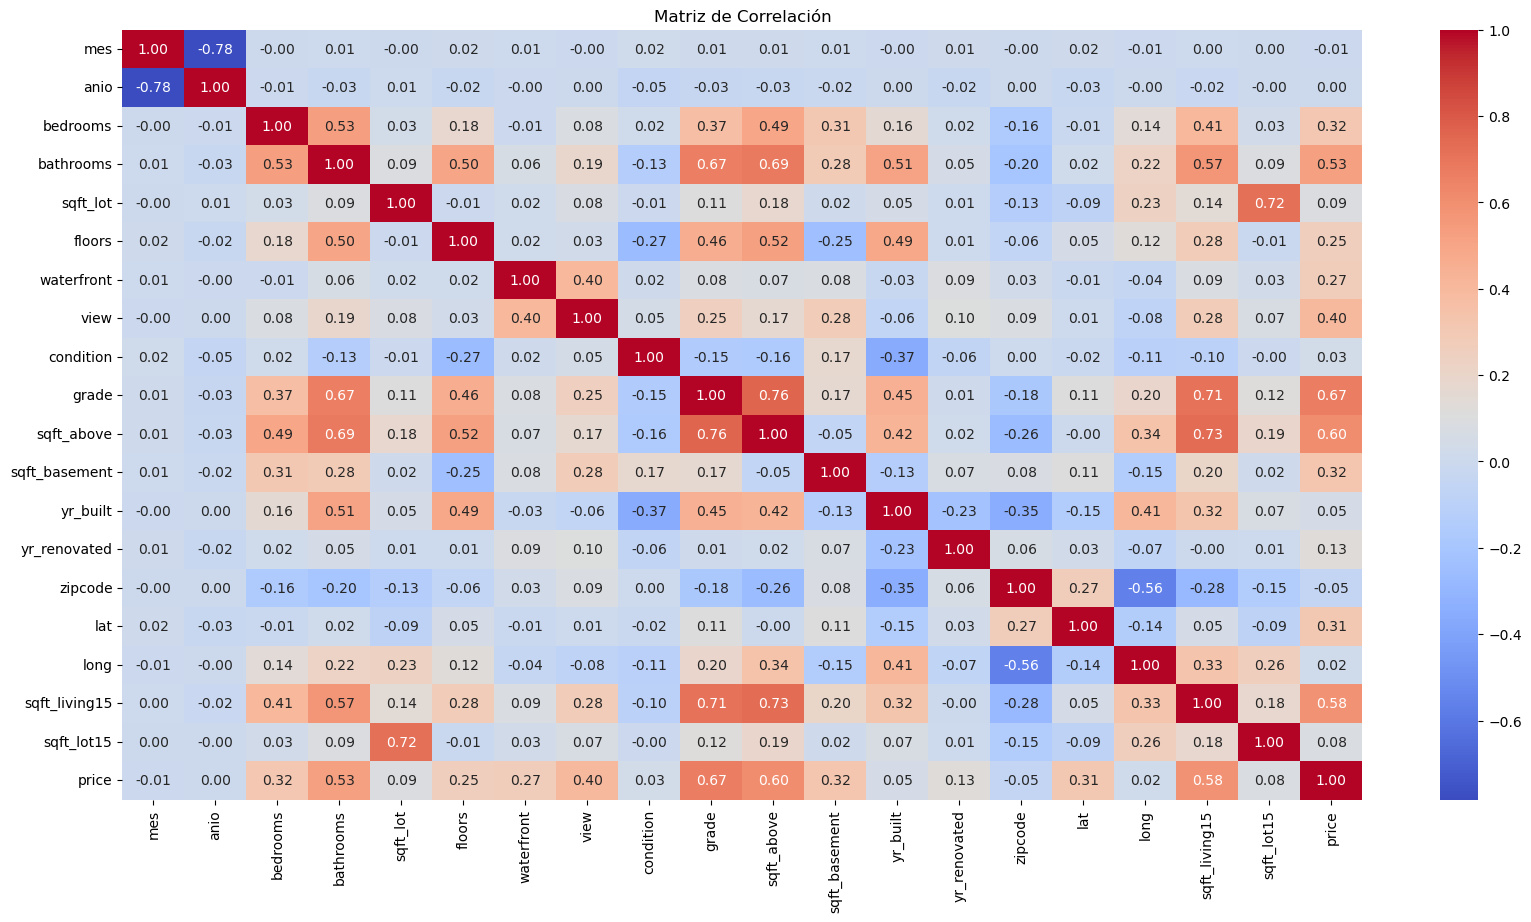

In [910]:
# Creamos una tabla de correlatividad para conocer el comportamiento de los datos

corr_matrix = df3.corr(numeric_only=True)

# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 10))

# Cambiamos el mapa de colores (cmap) para mejorar la visualización
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Agregar título al heatmap
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

In [911]:
# Supongamos que tienes un DataFrame llamado 'df'
# y 'price' es la columna objetivo
regression_metrics(df3, 'price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2651.
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:49:09   Log-Likelihood:            -2.9191e+05
No. Observations:               21419   AIC:                         5.839e+05
Df Residuals:                   21399   BIC:                         5.840e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.743e+07   9.98e+06     -6.759

KNeighborsRegressor

MLPRegressor

In [912]:
def train_and_test_models(models, X_train, X_test, y_train, y_test):
    results = {}
    
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        predictions = model.predict(X_test)
        
        # Evaluate the model's performance
        r2 = r2_score(y_test, predictions)
        
        # Store the results
        results[model_name] = r2
    
    return results

def train_and_test_multiple_models(models, X_train, X_test, y_train, y_test):
    results = train_and_test_models(models, X_train, X_test, y_train, y_test)

    # Print the results
    for model_name, r2 in results.items():
        print(f"{model_name}: R2 score = {r2}")

#Modelos
models = {
    "KNN": KNeighborsRegressor(),
    "MLP": MLPRegressor()
}

train_and_test_multiple_models(models, X_train, X_test, y_train, y_test)

KNN: R2 score = 0.3998038886236416
MLP: R2 score = -0.4836478544447582


Vemos que el último DataFrame es el mas optimo para continuar trabajando, ahora probaremos normalizar y escalar el DataFrame con el objetivo de mejorar el modelo

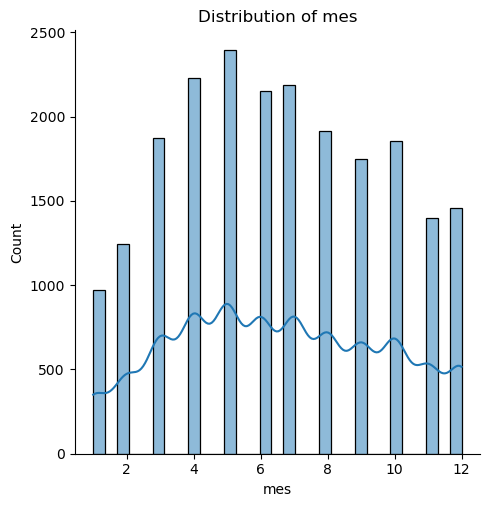

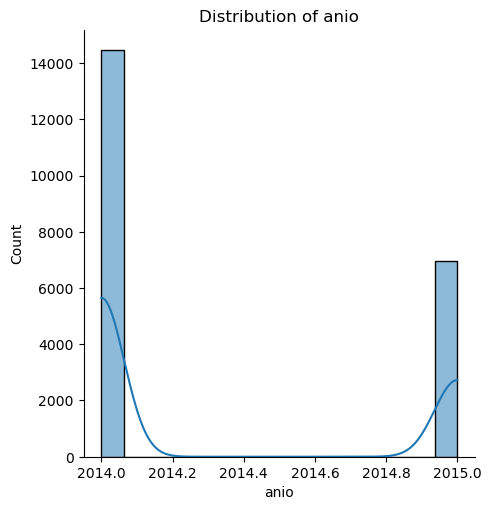

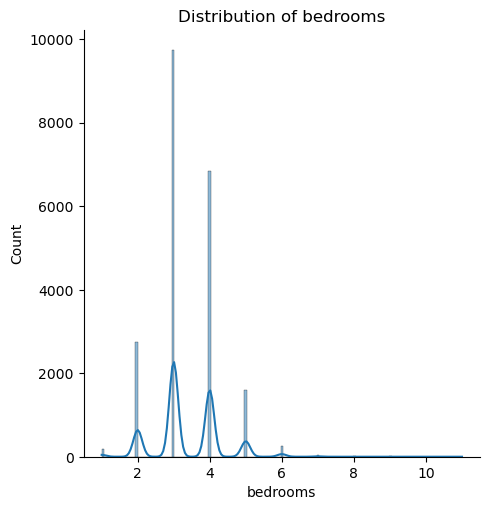

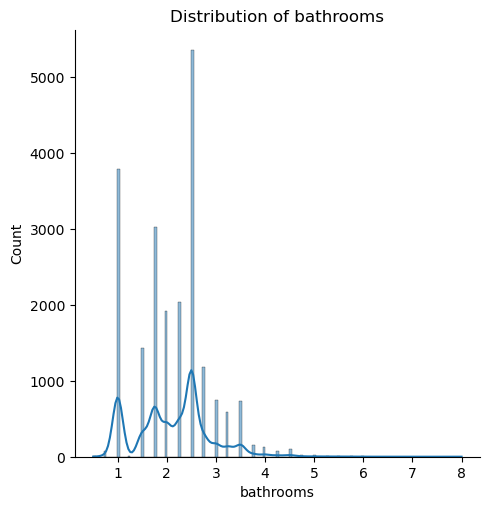

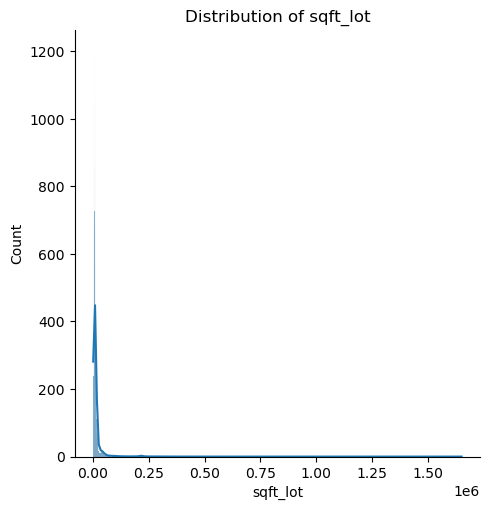

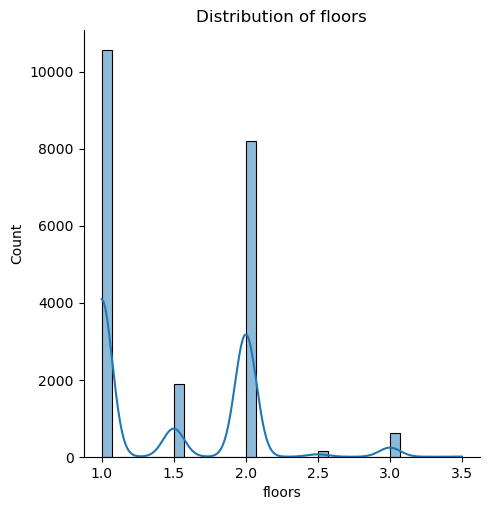

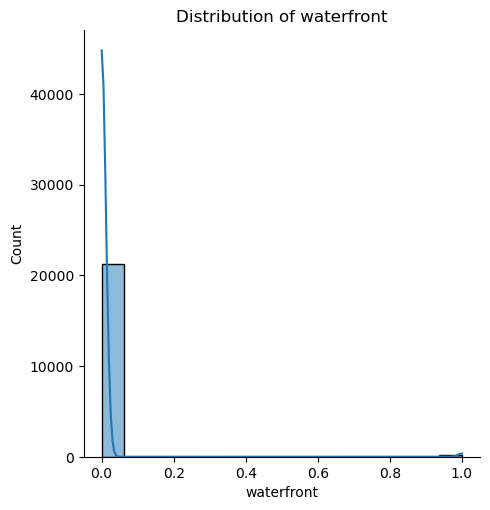

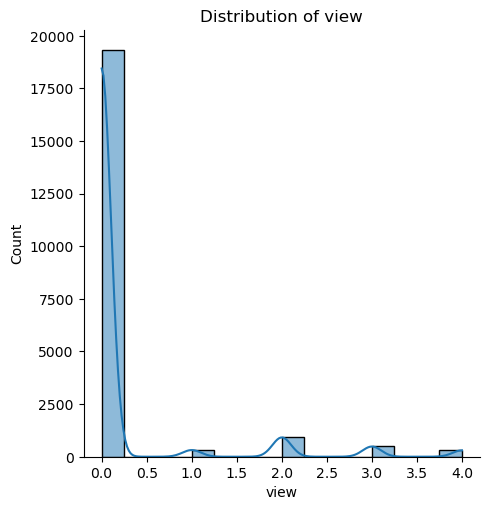

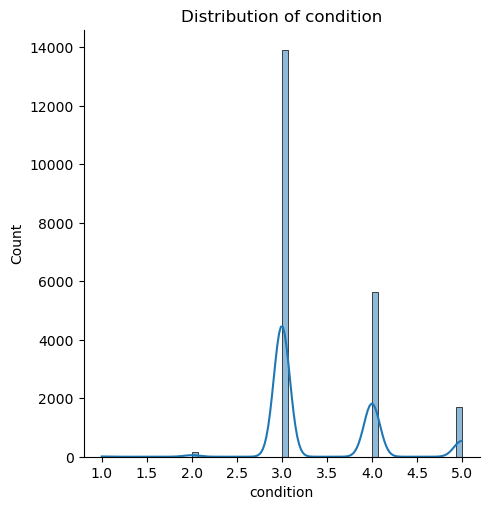

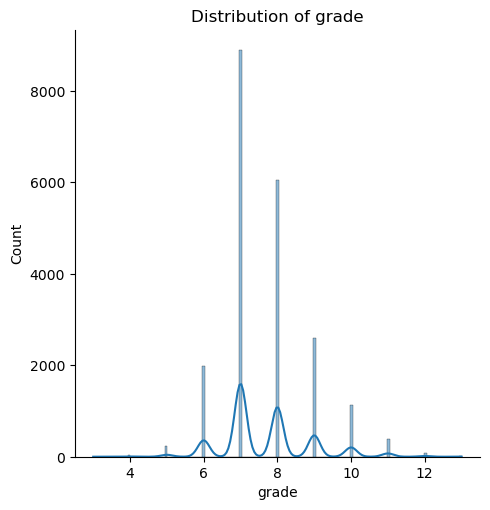

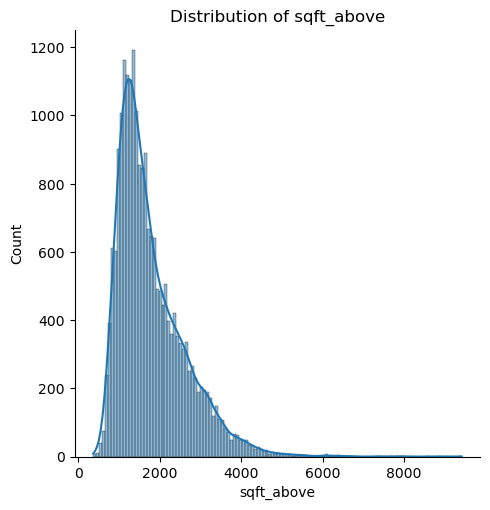

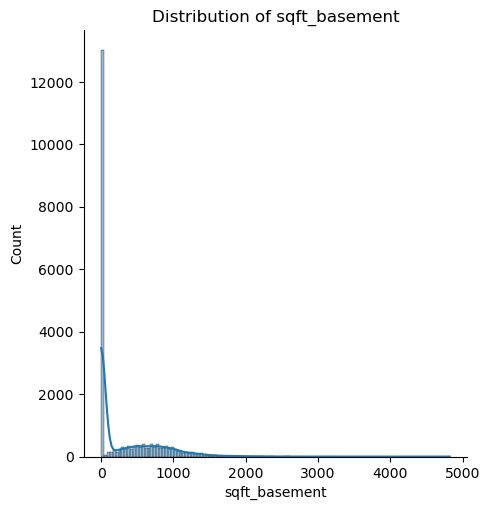

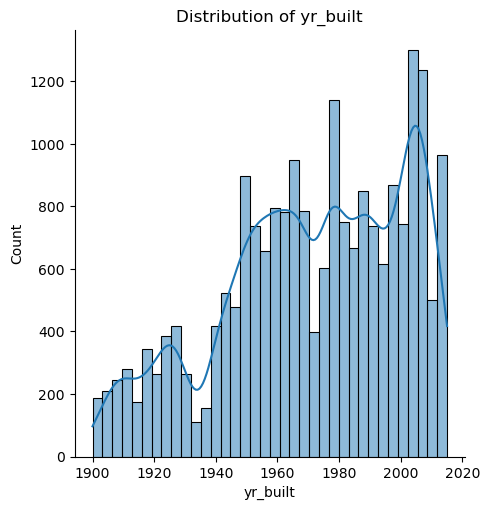

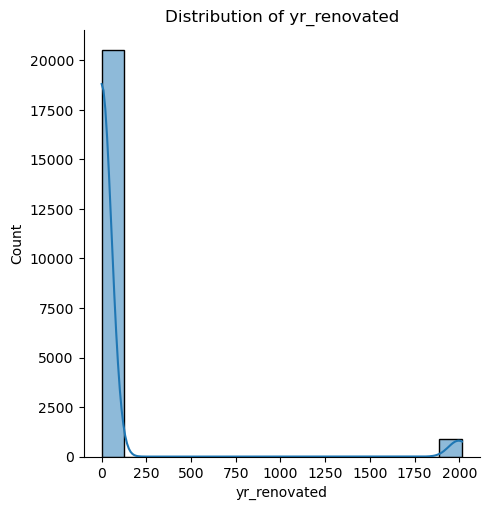

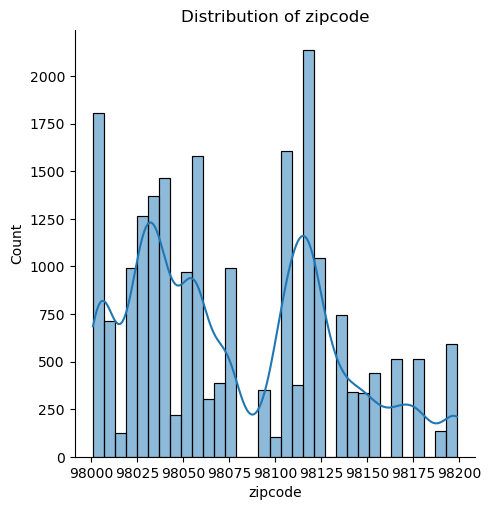

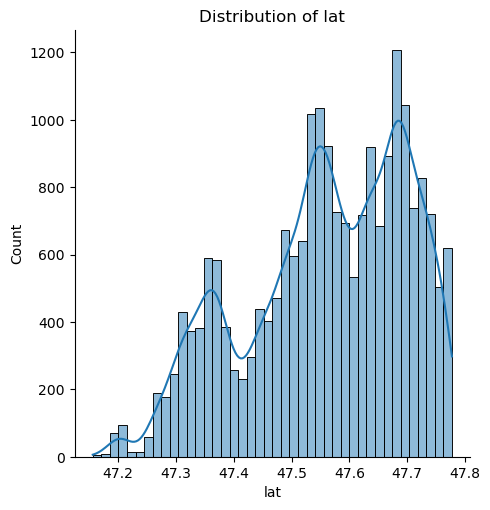

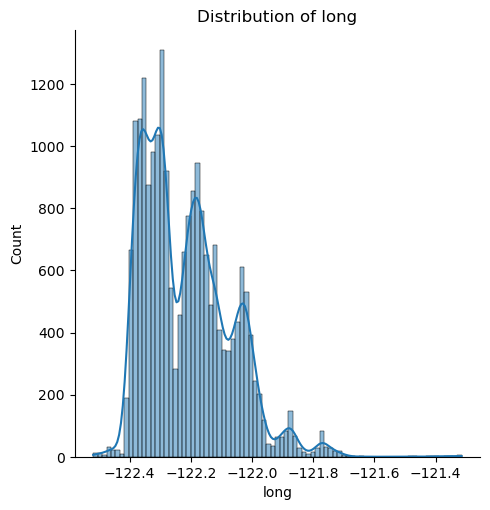

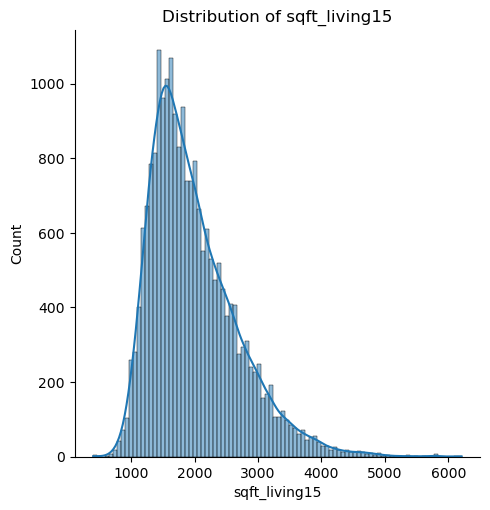

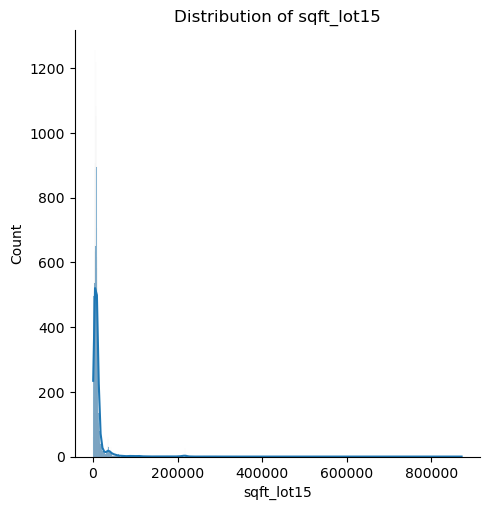

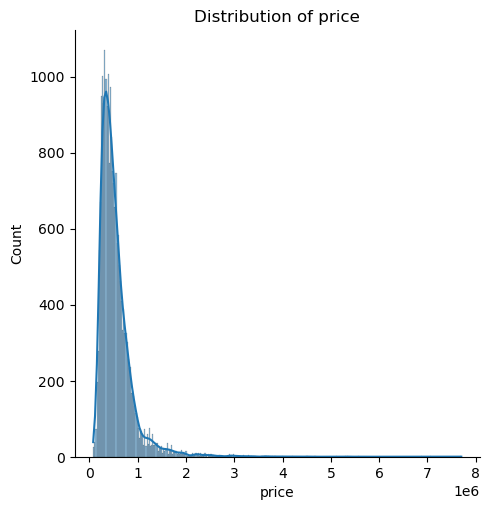

In [913]:
for column in df3.columns:
    sns.displot(df3[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

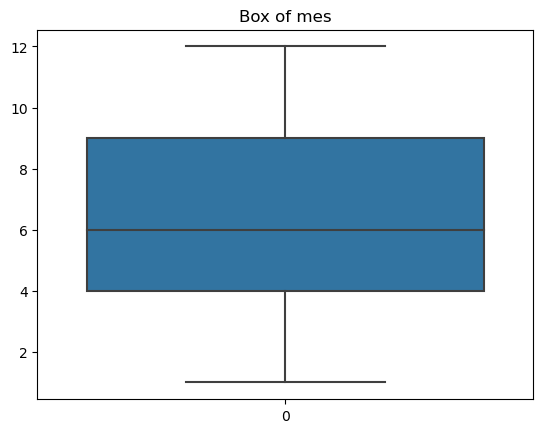

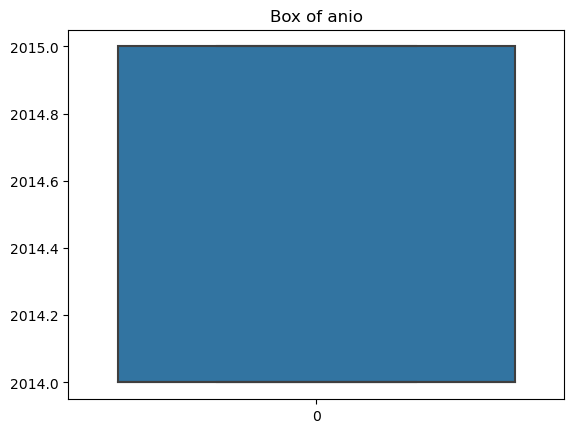

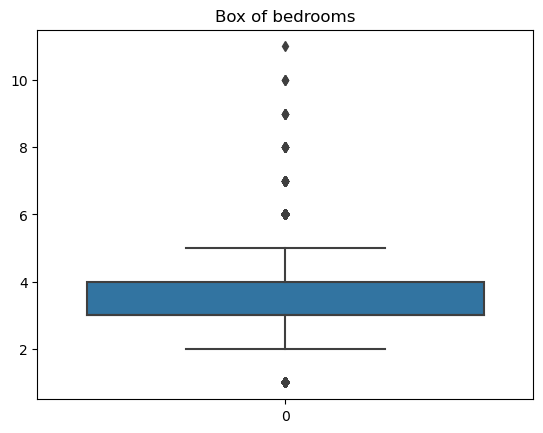

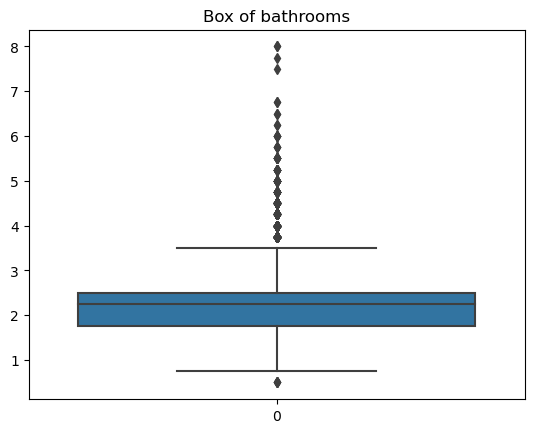

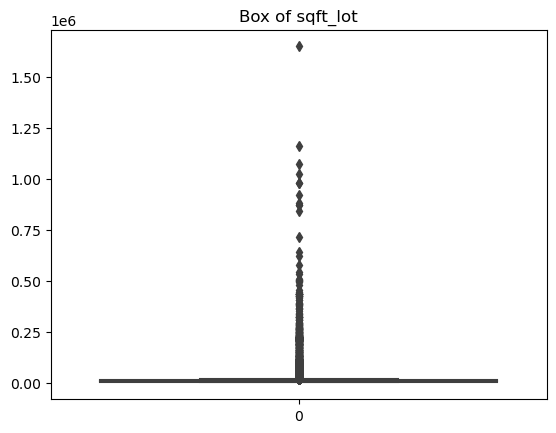

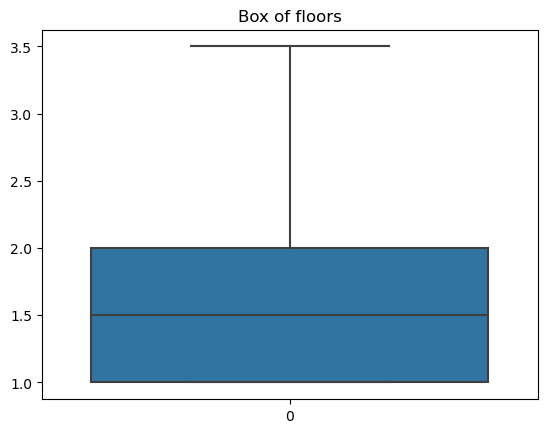

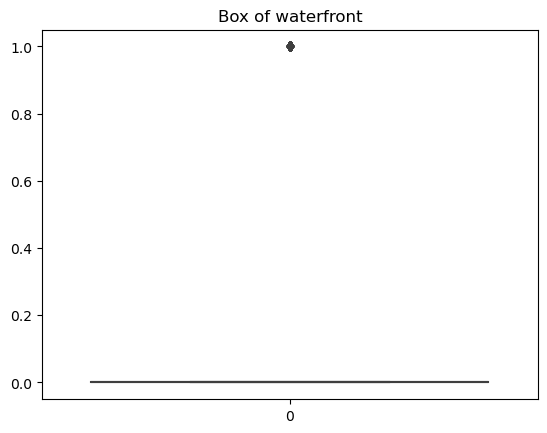

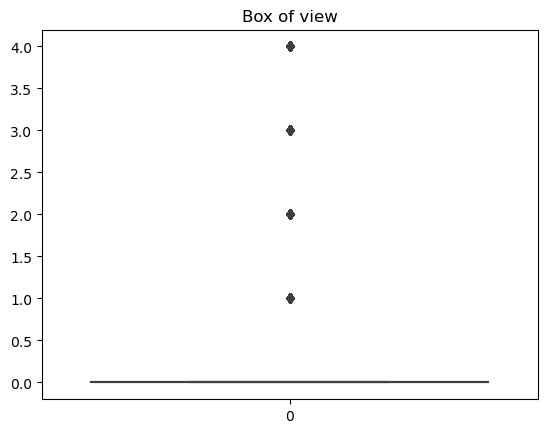

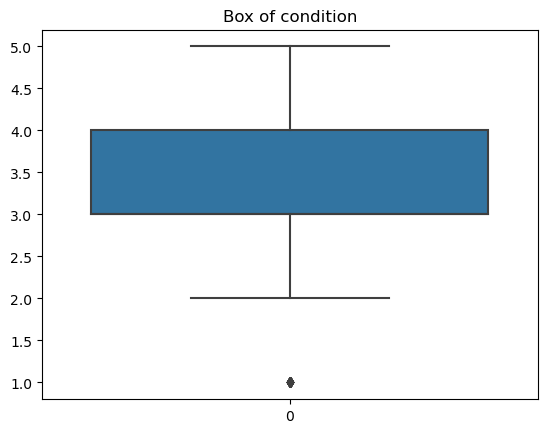

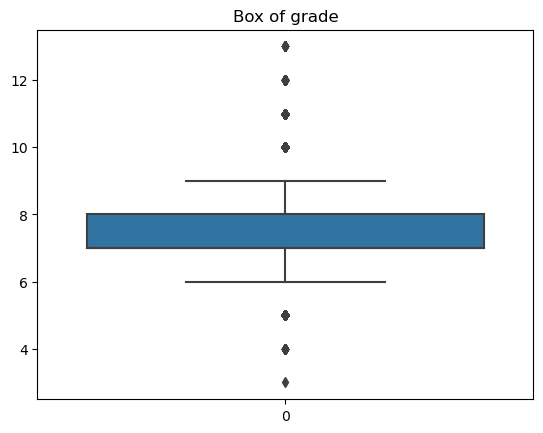

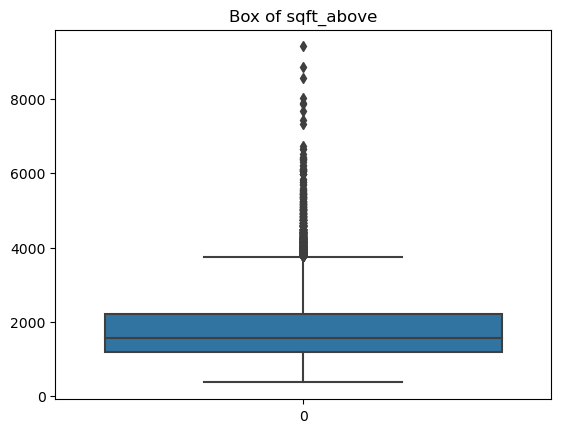

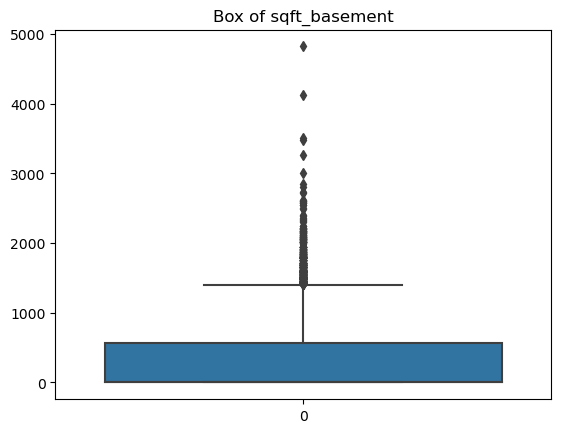

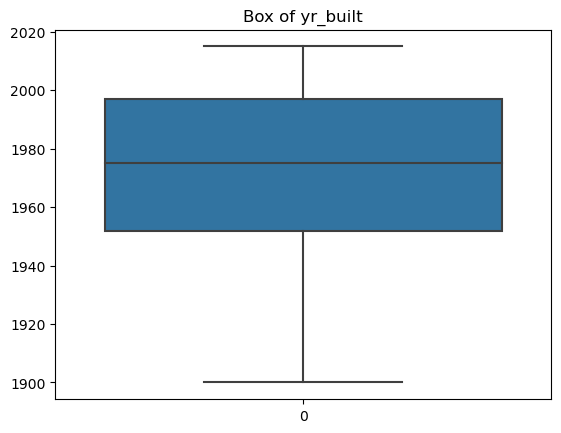

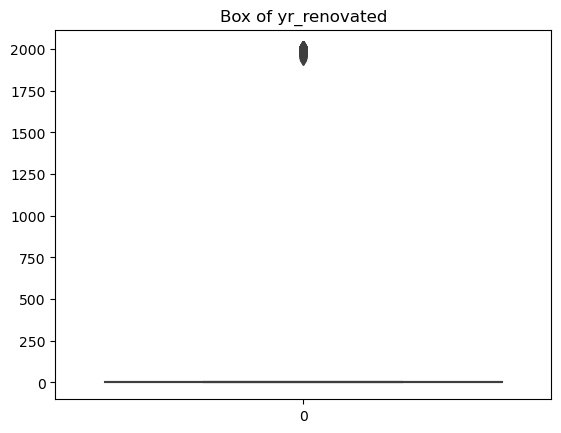

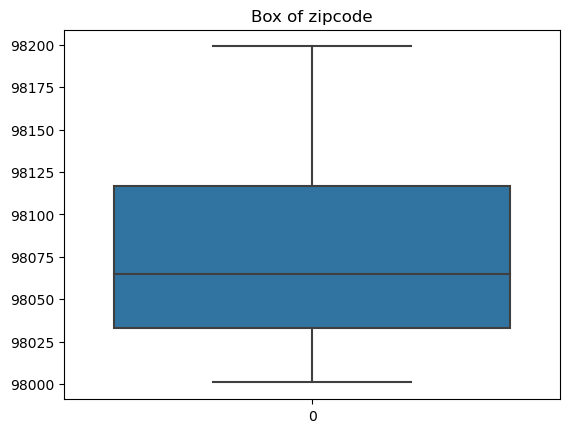

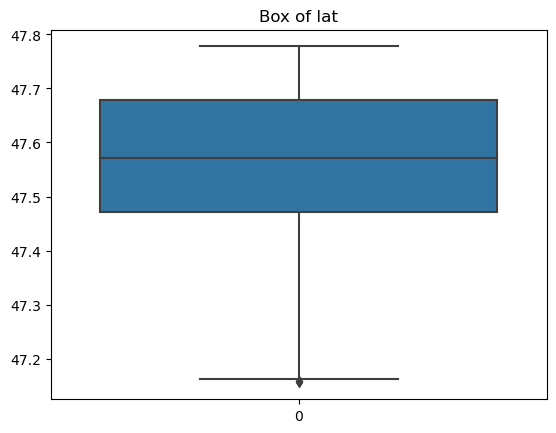

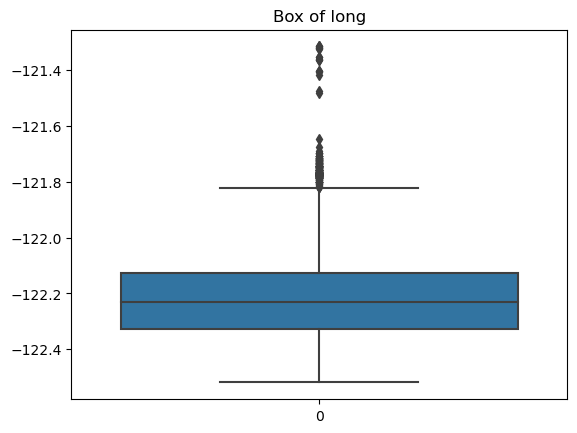

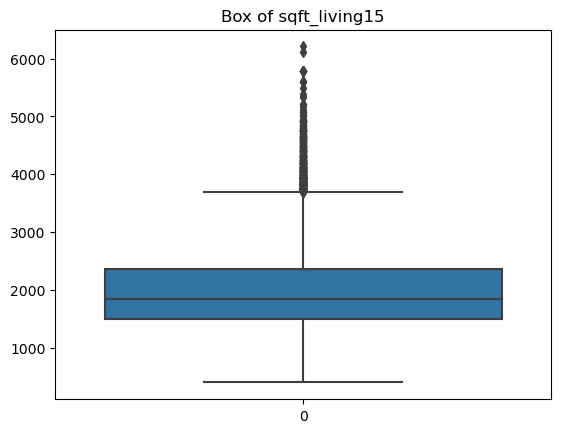

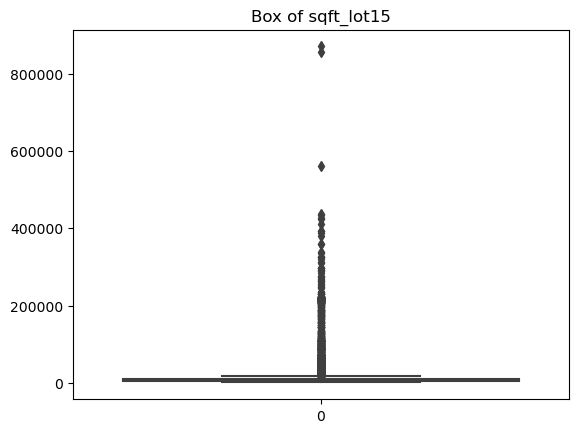

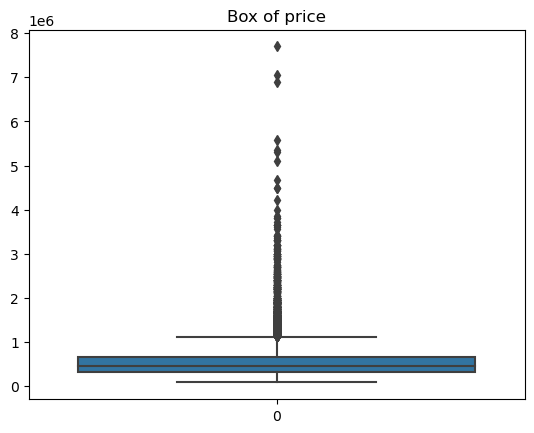

In [914]:
for column in df3.columns:
    sns.boxplot(df3[column])
    plt.title(f"Box of {column}")
    plt.show()

In [915]:
# Calcular los límites superior e inferior para identificar los outliers
Q1 = df3['price'].quantile(0.25)
Q3 = df3['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Contar los outliers en la columna "Total Claim Amount"
outliers_count = len(df3[(df3['price'] < lower_bound) | (df3['price'] > upper_bound)])

# Imprimir el número de outliers
print("Número de outliers:", outliers_count, lower_bound, upper_bound)

Número de outliers: 1152 -155125.0 1125075.0


In [916]:
# Como la cantidad de outliers un muy baja elimino los valores superiores al 0.75 e inferiores a 0.25

df4 = df3.drop(df3[(df3['price'] < lower_bound1) | (df3['price'] > upper_bound1)].index)

df3.shape

(21419, 20)

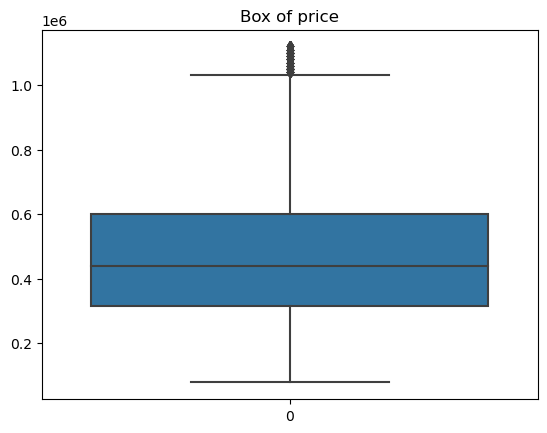

In [917]:
sns.boxplot(df4['price'])
plt.title(f"Box of {'price'}")
plt.show()

In [918]:
# Supongamos que tienes un DataFrame llamado 'df'
# y 'price' es la columna objetivo
regression_metrics(df4, 'price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2480.
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:49:29   Log-Likelihood:            -2.6470e+05
No. Observations:               20267   AIC:                         5.294e+05
Df Residuals:                   20247   BIC:                         5.296e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.296e+07   5.82e+06     -9.098

Test size: 0.4, MSE: 13436553478.230522
Test size: 0.4, RMSE: 115916.1484791076
Test size: 0.4, R2: 0.6868739013225691
Test size: 0.4, Adjusted R2: 0.6860994118378364
----------------------------------
Test size: 0.3, MSE: 13295107556.47771
Test size: 0.3, RMSE: 115304.4125629098
Test size: 0.3, R2: 0.6900669545933379
Test size: 0.3, Adjusted R2: 0.6890440732553621
----------------------------------
Test size: 0.2, MSE: 13423248068.406946
Test size: 0.2, RMSE: 115858.74187305395
Test size: 0.2, R2: 0.6823558585971939
Test size: 0.2, Adjusted R2: 0.6807806334972544
----------------------------------
Test size: 0.1, MSE: 13837522407.167616
Test size: 0.1, RMSE: 117632.99880206921
Test size: 0.1, R2: 0.6609790830254032
Test size: 0.1, Adjusted R2: 0.6575990140625458
----------------------------------


Eliminar outliers perjudico el R2 del modelo

Normalizamos el modelo para ver si el modelo mejora

In [919]:
#Normalimos

transformer=StandardScaler().fit(df3)
df_norm= transformer.transform(df3)
print(df_norm.shape)
df_norm= pd.DataFrame(df_norm)

(21419, 20)


In [920]:
# Estableces los nuevos nombres de columnas en el DataFrame normalizado
df3_col = df3.columns
df_norm.columns = df3_col

# Visualizas el DataFrame normalizado
df_norm

,mes,anio,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1.102034,-0.694319,-0.412591,-1.454954,-0.228228,-0.918414,-0.08757,-0.306477,-0.631916,-0.565567,-0.737568,-0.659219,-0.547667,-0.210637,1.872327,-0.353507,-0.306999,-0.945870,-0.260594,-0.870497
1,1.743503,-0.694319,-0.412591,0.171134,-0.189895,0.933196,-0.08757,-0.306477,-0.631916,-0.565567,0.457108,0.243978,-0.683783,4.735035,0.881250,1.160348,-0.747376,-0.435310,-0.187858,-0.010493
2,-1.463843,1.440261,-1.520021,-1.454954,-0.123486,-0.918414,-0.08757,-0.306477,-0.631916,-1.418836,-1.232332,-0.659219,-1.296306,-0.210637,-0.932607,1.282294,-0.136530,1.067194,-0.172390,-0.984494
3,1.743503,-0.694319,0.694839,1.146788,-0.243879,-0.918414,-0.08757,-0.306477,2.445270,-0.565567,-0.894444,1.395555,-0.207377,-0.210637,1.086945,-0.284236,-1.272988,-0.916695,-0.284364,0.169071
4,-1.463843,1.440261,-0.412591,-0.154083,-0.169717,-0.918414,-0.08757,-0.306477,-0.631916,0.287703,-0.134196,-0.659219,0.541261,-0.210637,-0.072427,0.408472,1.198809,-0.274849,-0.192832,-0.086672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21414,-0.501639,-0.694319,-0.412591,0.496352,-0.337039,2.784807,-0.08757,-0.306477,-0.631916,0.287703,-0.315208,-0.659219,1.289900,-0.210637,0.469860,1.003768,-0.939154,-0.668709,-0.412026,-0.494773
21415,-1.463843,1.440261,0.694839,0.496352,-0.224303,0.933196,-0.08757,-0.306477,-0.631916,0.287703,0.626052,-0.659219,1.460045,-0.210637,1.273941,-0.357115,-1.052800,-0.231086,-0.203912,-0.385946
21416,-0.180905,-0.694319,-1.520021,-1.780172,-0.331765,0.933196,-0.08757,-0.306477,-0.631916,-0.565567,-0.930646,-0.659219,1.289900,-0.210637,1.236542,0.246840,-0.605319,-1.412667,-0.393815,-0.380230
21417,-1.784577,1.440261,-0.412591,0.496352,-0.306772,0.933196,-0.08757,-0.306477,-0.631916,0.287703,-0.230736,-0.659219,1.119755,-0.210637,-0.951306,-0.185381,1.028340,-0.843758,-0.420145,-0.385946


In [921]:
# Aplicamos la función regression_metrics en el DataFrame normalizado

regression_metrics(df_norm, 'price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2651.
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:49:29   Log-Likelihood:                -17433.
No. Observations:               21419   AIC:                         3.491e+04
Df Residuals:                   21399   BIC:                         3.507e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.15e-14      0.004   3.08e-12

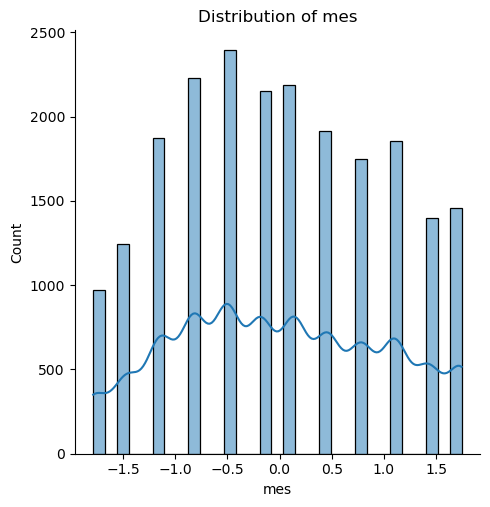

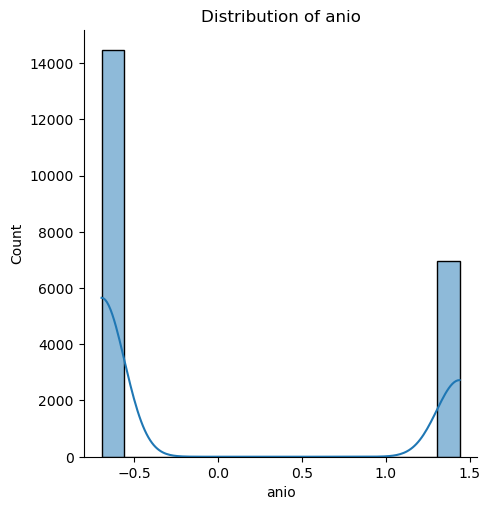

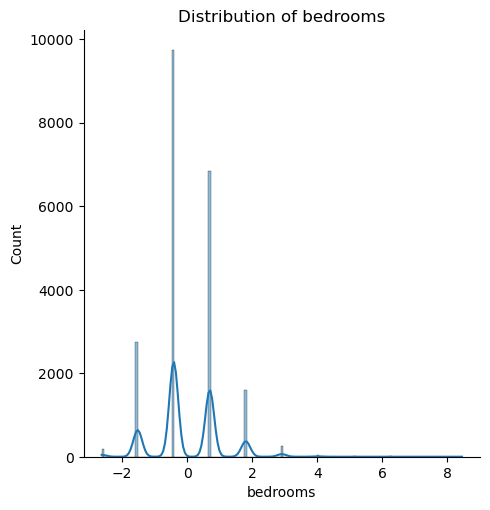

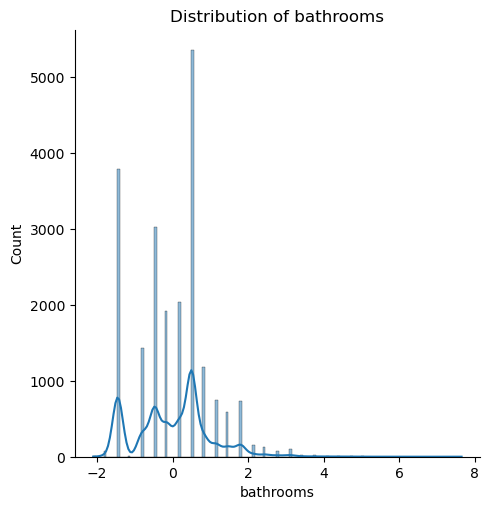

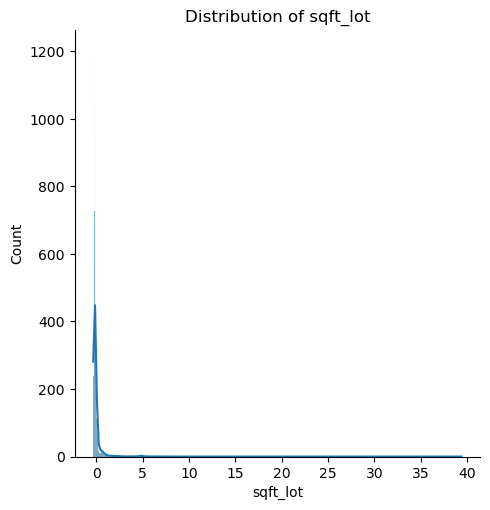

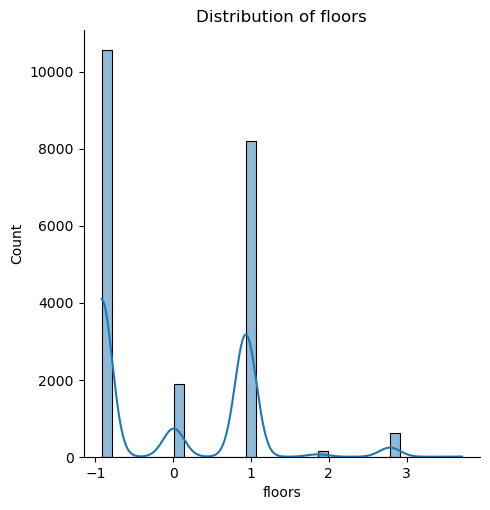

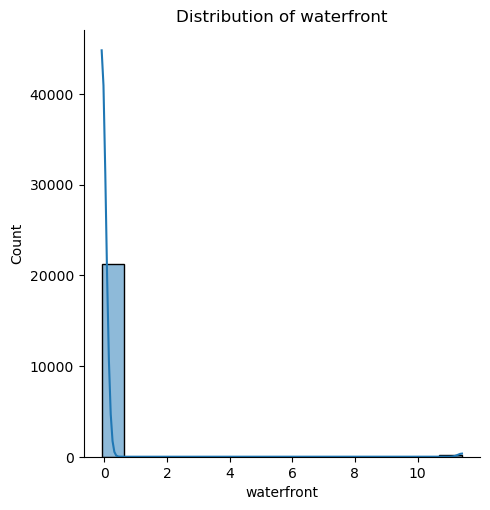

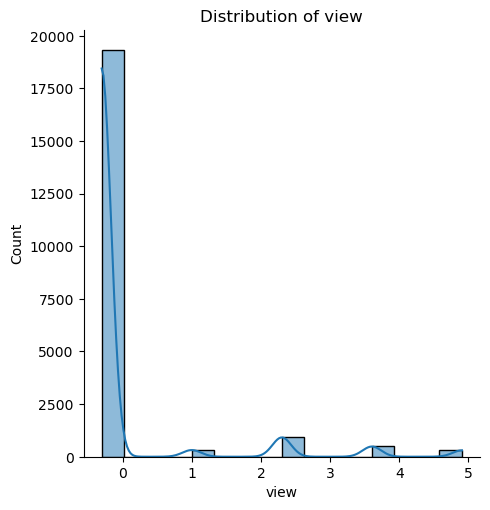

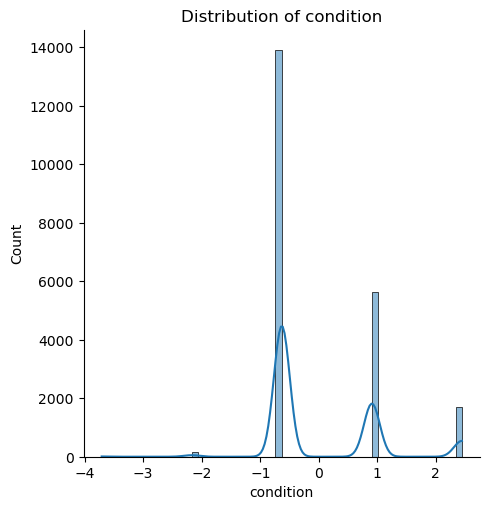

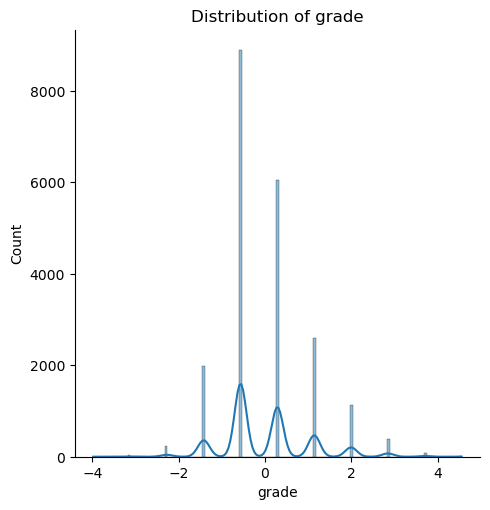

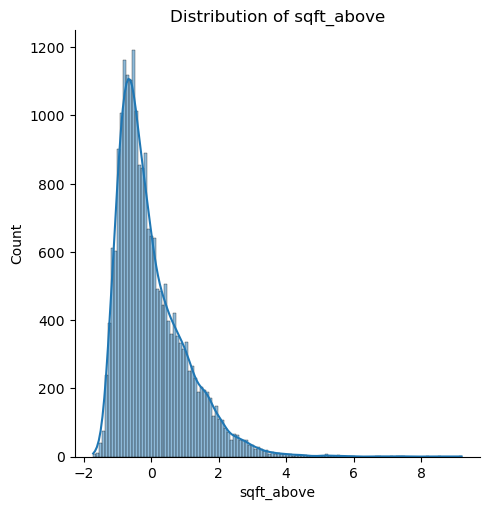

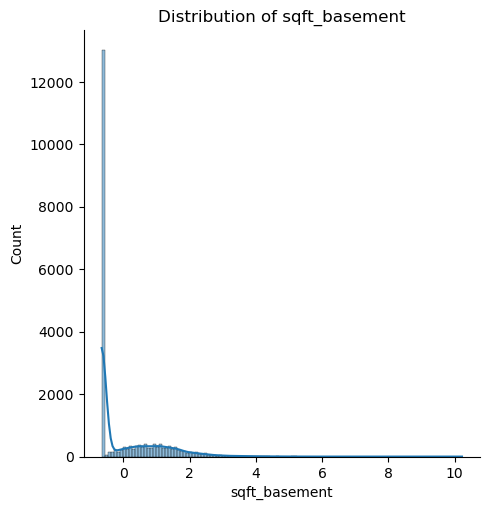

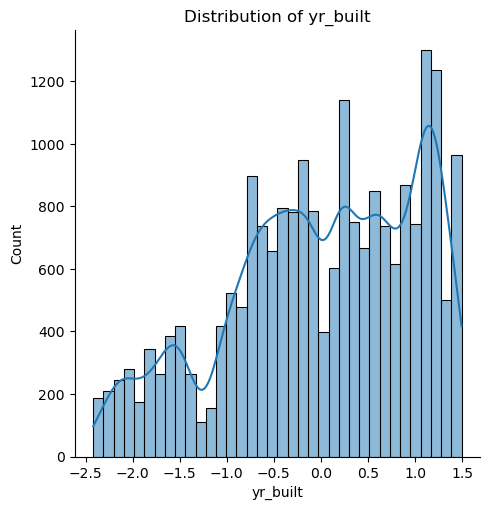

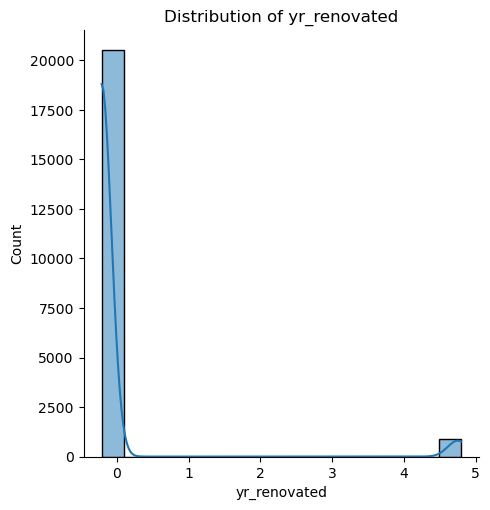

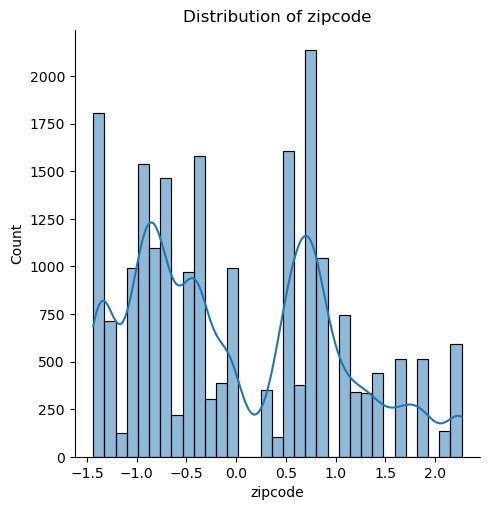

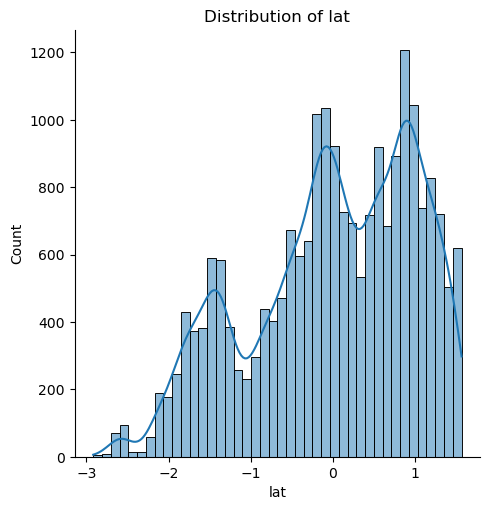

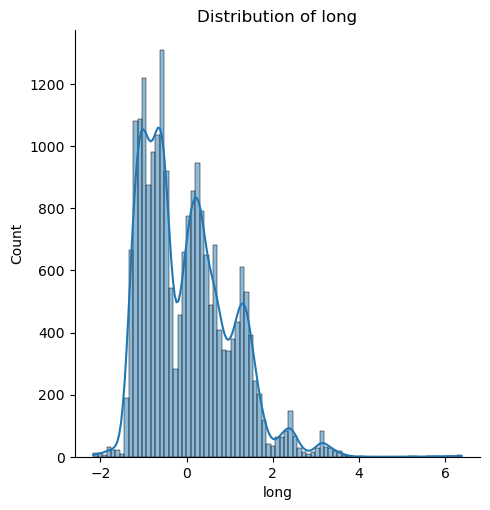

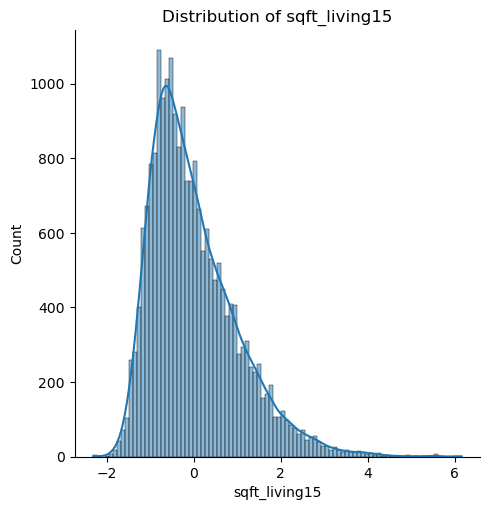

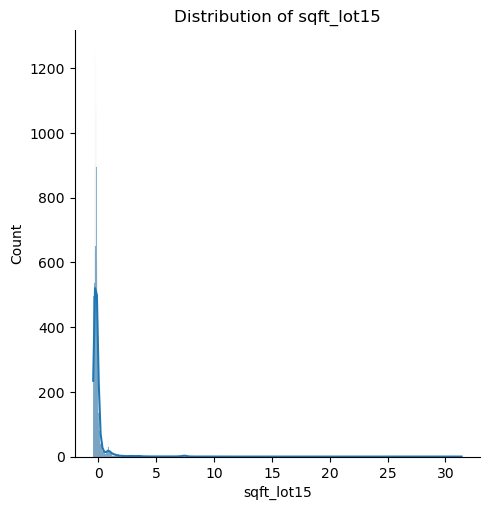

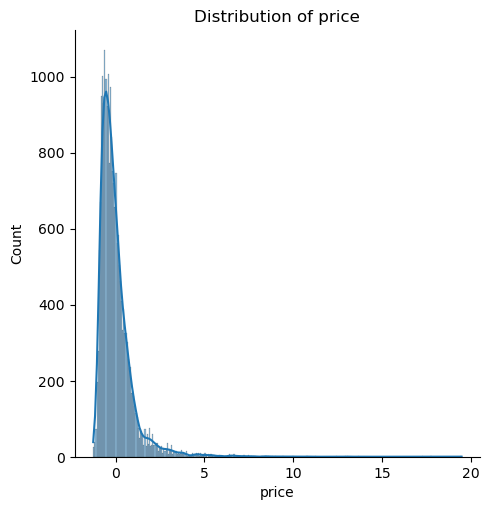

In [922]:
for column in df_norm.columns:
    sns.displot(df_norm[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

In [ ]:
dfpred=pd.DataFrame(columns=[y_test, predictions]).T
dfpred